#### AZALBERT Oriane, BONGINI Arthur, CHOPRA Shahina

# ML for Gas Adsorption

## -1. Only if you run this notebook on Colab

If you use this notebook on Colab, please uncomment the lines below (remove the `#`) and execute the cell.

In [1]:
#import sys
#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension
#!pip install --upgrade pandas sklearn holoviews bokeh plotly matplotlib
#!wget https://raw.githubusercontent.com/kjappelbaum/ml_molsim/2022/descriptornames.py
#!mkdir data
#!cd data && wget https://github.com/kjappelbaum/ml_molsim/raw/2022/data/data.csv
#!cd data && wget https://github.com/kjappelbaum/ml_molsim/raw/2022/data/features.csv
# import os, holoviews as hv
# os.environ['HV_DOC_HTML'] = 'true'

## Import packages we will need

In [2]:
# basics
import os
import numpy as np
import pprint as pp

# pandas is used to read/process data
import pandas as pd

# machine learning dependencies
# scaling of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# train/test split
from sklearn.model_selection import train_test_split
# model selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# the KRR model
from sklearn.kernel_ridge import KernelRidge
# linear model
from sklearn.linear_model import LinearRegression
# pipeline to streamline modeling pipelines
from sklearn.pipeline import Pipeline
# principal component analysis
from sklearn.decomposition import PCA
# polynomial kernel
from sklearn.metrics.pairwise import polynomial_kernel
# Dummy model as baseline
from sklearn.dummy import DummyClassifier, DummyRegressor
# Variance Threshold for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
# metrics to measure model performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, max_error)

# save/load models
import joblib

# For the permutation importance implementation
from joblib import Parallel
from joblib import delayed
from sklearn.metrics import check_scoring
from sklearn.utils import Bunch
from sklearn.utils import check_random_state
from sklearn.utils import check_array

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
from pymatviz.parity import hist_density
import seaborn as sns

RANDOM_SEED = 4242424242
DATA_DIR = 'data'
DATA_FILE = os.path.join(DATA_DIR, 'data.csv')

np.random.seed(RANDOM_SEED)

In [3]:

other_descriptors = ["CellV [A^3]"]

geometric_descriptors = [
    "Di",
    "Df",
    "Dif",
    "density [g/cm^3]",
    "total_SA_volumetric",
    "total_SA_gravimetric",
    "total_POV_volumetric",
    "total_POV_gravimetric",
]

linker_descriptors = [
    "f-lig-chi-0",
    "f-lig-chi-1",
    "f-lig-chi-2",
    "f-lig-chi-3",
    "f-lig-Z-0",
    "f-lig-Z-1",
    "f-lig-Z-2",
    "f-lig-Z-3",
    "f-lig-I-0",
    "f-lig-I-1",
    "f-lig-I-2",
    "f-lig-I-3",
    "f-lig-T-0",
    "f-lig-T-1",
    "f-lig-T-2",
    "f-lig-T-3",
    "f-lig-S-0",
    "f-lig-S-1",
    "f-lig-S-2",
    "f-lig-S-3",
    "lc-chi-0-all",
    "lc-chi-1-all",
    "lc-chi-2-all",
    "lc-chi-3-all",
    "lc-Z-0-all",
    "lc-Z-1-all",
    "lc-Z-2-all",
    "lc-Z-3-all",
    "lc-I-0-all",
    "lc-I-1-all",
    "lc-I-2-all",
    "lc-I-3-all",
    "lc-T-0-all",
    "lc-T-1-all",
    "lc-T-2-all",
    "lc-T-3-all",
    "lc-S-0-all",
    "lc-S-1-all",
    "lc-S-2-all",
    "lc-S-3-all",
    "lc-alpha-0-all",
    "lc-alpha-1-all",
    "lc-alpha-2-all",
    "lc-alpha-3-all",
    "D_lc-chi-0-all",
    "D_lc-chi-1-all",
    "D_lc-chi-2-all",
    "D_lc-chi-3-all",
    "D_lc-Z-0-all",
    "D_lc-Z-1-all",
    "D_lc-Z-2-all",
    "D_lc-Z-3-all",
    "D_lc-I-0-all",
    "D_lc-I-1-all",
    "D_lc-I-2-all",
    "D_lc-I-3-all",
    "D_lc-T-0-all",
    "D_lc-T-1-all",
    "D_lc-T-2-all",
    "D_lc-T-3-all",
    "D_lc-S-0-all",
    "D_lc-S-1-all",
    "D_lc-S-2-all",
    "D_lc-S-3-all",
    "D_lc-alpha-0-all",
    "D_lc-alpha-1-all",
    "D_lc-alpha-2-all",
    "D_lc-alpha-3-all",
]

metalcenter_descriptors = [
    "mc_CRY-chi-0-all",
    "mc_CRY-chi-1-all",
    "mc_CRY-chi-2-all",
    "mc_CRY-chi-3-all",
    "mc_CRY-Z-0-all",
    "mc_CRY-Z-1-all",
    "mc_CRY-Z-2-all",
    "mc_CRY-Z-3-all",
    "mc_CRY-I-0-all",
    "mc_CRY-I-1-all",
    "mc_CRY-I-2-all",
    "mc_CRY-I-3-all",
    "mc_CRY-T-0-all",
    "mc_CRY-T-1-all",
    "mc_CRY-T-2-all",
    "mc_CRY-T-3-all",
    "mc_CRY-S-0-all",
    "mc_CRY-S-1-all",
    "mc_CRY-S-2-all",
    "mc_CRY-S-3-all",
    "D_mc_CRY-chi-0-all",
    "D_mc_CRY-chi-1-all",
    "D_mc_CRY-chi-2-all",
    "D_mc_CRY-chi-3-all",
    "D_mc_CRY-Z-0-all",
    "D_mc_CRY-Z-1-all",
    "D_mc_CRY-Z-2-all",
    "D_mc_CRY-Z-3-all",
    "D_mc_CRY-I-0-all",
    "D_mc_CRY-I-1-all",
    "D_mc_CRY-I-2-all",
    "D_mc_CRY-I-3-all",
    "D_mc_CRY-T-0-all",
    "D_mc_CRY-T-1-all",
    "D_mc_CRY-T-2-all",
    "D_mc_CRY-T-3-all",
    "D_mc_CRY-S-0-all",
    "D_mc_CRY-S-1-all",
    "D_mc_CRY-S-2-all",
    "D_mc_CRY-S-3-all",
]

functionalgroup_descriptors = [
    "func-chi-0-all",
    "func-chi-1-all",
    "func-chi-2-all",
    "func-chi-3-all",
    "func-Z-0-all",
    "func-Z-1-all",
    "func-Z-2-all",
    "func-Z-3-all",
    "func-I-0-all",
    "func-I-1-all",
    "func-I-2-all",
    "func-I-3-all",
    "func-T-0-all",
    "func-T-1-all",
    "func-T-2-all",
    "func-T-3-all",
    "func-S-0-all",
    "func-S-1-all",
    "func-S-2-all",
    "func-S-3-all",
    "func-alpha-0-all",
    "func-alpha-1-all",
    "func-alpha-2-all",
    "func-alpha-3-all",
    "D_func-chi-0-all",
    "D_func-chi-1-all",
    "D_func-chi-2-all",
    "D_func-chi-3-all",
    "D_func-Z-0-all",
    "D_func-Z-1-all",
    "D_func-Z-2-all",
    "D_func-Z-3-all",
    "D_func-I-0-all",
    "D_func-I-1-all",
    "D_func-I-2-all",
    "D_func-I-3-all",
    "D_func-T-0-all",
    "D_func-T-1-all",
    "D_func-T-2-all",
    "D_func-T-3-all",
    "D_func-S-0-all",
    "D_func-S-1-all",
    "D_func-S-2-all",
    "D_func-S-3-all",
    "D_func-alpha-0-all",
    "D_func-alpha-1-all",
    "D_func-alpha-2-all",
    "D_func-alpha-3-all",
]


summed_linker_descriptors = [
    "sum-f-lig-chi-0",
    "sum-f-lig-chi-1",
    "sum-f-lig-chi-2",
    "sum-f-lig-chi-3",
    "sum-f-lig-Z-0",
    "sum-f-lig-Z-1",
    "sum-f-lig-Z-2",
    "sum-f-lig-Z-3",
    "sum-f-lig-I-0",
    "sum-f-lig-I-1",
    "sum-f-lig-I-2",
    "sum-f-lig-I-3",
    "sum-f-lig-T-0",
    "sum-f-lig-T-1",
    "sum-f-lig-T-2",
    "sum-f-lig-T-3",
    "sum-f-lig-S-0",
    "sum-f-lig-S-1",
    "sum-f-lig-S-2",
    "sum-f-lig-S-3",
    "sum-lc-chi-0-all",
    "sum-lc-chi-1-all",
    "sum-lc-chi-2-all",
    "sum-lc-chi-3-all",
    "sum-lc-Z-0-all",
    "sum-lc-Z-1-all",
    "sum-lc-Z-2-all",
    "sum-lc-Z-3-all",
    "sum-lc-I-0-all",
    "sum-lc-I-1-all",
    "sum-lc-I-2-all",
    "sum-lc-I-3-all",
    "sum-lc-T-0-all",
    "sum-lc-T-1-all",
    "sum-lc-T-2-all",
    "sum-lc-T-3-all",
    "sum-lc-S-0-all",
    "sum-lc-S-1-all",
    "sum-lc-S-2-all",
    "sum-lc-S-3-all",
    "sum-lc-alpha-0-all",
    "sum-lc-alpha-1-all",
    "sum-lc-alpha-2-all",
    "sum-lc-alpha-3-all",
    "sum-D_lc-chi-0-all",
    "sum-D_lc-chi-1-all",
    "sum-D_lc-chi-2-all",
    "sum-D_lc-chi-3-all",
    "sum-D_lc-Z-0-all",
    "sum-D_lc-Z-1-all",
    "sum-D_lc-Z-2-all",
    "sum-D_lc-Z-3-all",
    "sum-D_lc-I-0-all",
    "sum-D_lc-I-1-all",
    "sum-D_lc-I-2-all",
    "sum-D_lc-I-3-all",
    "sum-D_lc-T-0-all",
    "sum-D_lc-T-1-all",
    "sum-D_lc-T-2-all",
    "sum-D_lc-T-3-all",
    "sum-D_lc-S-0-all",
    "sum-D_lc-S-1-all",
    "sum-D_lc-S-2-all",
    "sum-D_lc-S-3-all",
    "sum-D_lc-alpha-0-all",
    "sum-D_lc-alpha-1-all",
    "sum-D_lc-alpha-2-all",
    "sum-D_lc-alpha-3-all",
]

summed_metalcenter_descriptors = [
    "sum-mc_CRY-chi-0-all",
    "sum-mc_CRY-chi-1-all",
    "sum-mc_CRY-chi-2-all",
    "sum-mc_CRY-chi-3-all",
    "sum-mc_CRY-Z-0-all",
    "sum-mc_CRY-Z-1-all",
    "sum-mc_CRY-Z-2-all",
    "sum-mc_CRY-Z-3-all",
    "sum-mc_CRY-I-0-all",
    "sum-mc_CRY-I-1-all",
    "sum-mc_CRY-I-2-all",
    "sum-mc_CRY-I-3-all",
    "sum-mc_CRY-T-0-all",
    "sum-mc_CRY-T-1-all",
    "sum-mc_CRY-T-2-all",
    "sum-mc_CRY-T-3-all",
    "sum-mc_CRY-S-0-all",
    "sum-mc_CRY-S-1-all",
    "sum-mc_CRY-S-2-all",
    "sum-mc_CRY-S-3-all",
    "sum-D_mc_CRY-chi-0-all",
    "sum-D_mc_CRY-chi-1-all",
    "sum-D_mc_CRY-chi-2-all",
    "sum-D_mc_CRY-chi-3-all",
    "sum-D_mc_CRY-Z-0-all",
    "sum-D_mc_CRY-Z-1-all",
    "sum-D_mc_CRY-Z-2-all",
    "sum-D_mc_CRY-Z-3-all",
    "sum-D_mc_CRY-I-0-all",
    "sum-D_mc_CRY-I-1-all",
    "sum-D_mc_CRY-I-2-all",
    "sum-D_mc_CRY-I-3-all",
    "sum-D_mc_CRY-T-0-all",
    "sum-D_mc_CRY-T-1-all",
    "sum-D_mc_CRY-T-2-all",
    "sum-D_mc_CRY-T-3-all",
    "sum-D_mc_CRY-S-0-all",
    "sum-D_mc_CRY-S-1-all",
    "sum-D_mc_CRY-S-2-all",
    "sum-D_mc_CRY-S-3-all",
]

summed_functionalgroup_descriptors = [
    "sum-func-chi-0-all",
    "sum-func-chi-1-all",
    "sum-func-chi-2-all",
    "sum-func-chi-3-all",
    "sum-func-Z-0-all",
    "sum-func-Z-1-all",
    "sum-func-Z-2-all",
    "sum-func-Z-3-all",
    "sum-func-I-0-all",
    "sum-func-I-1-all",
    "sum-func-I-2-all",
    "sum-func-I-3-all",
    "sum-func-T-0-all",
    "sum-func-T-1-all",
    "sum-func-T-2-all",
    "sum-func-T-3-all",
    "sum-func-S-0-all",
    "sum-func-S-1-all",
    "sum-func-S-2-all",
    "sum-func-S-3-all",
    "sum-func-alpha-0-all",
    "sum-func-alpha-1-all",
    "sum-func-alpha-2-all",
    "sum-func-alpha-3-all",
    "sum-D_func-chi-0-all",
    "sum-D_func-chi-1-all",
    "sum-D_func-chi-2-all",
    "sum-D_func-chi-3-all",
    "sum-D_func-Z-0-all",
    "sum-D_func-Z-1-all",
    "sum-D_func-Z-2-all",
    "sum-D_func-Z-3-all",
    "sum-D_func-I-0-all",
    "sum-D_func-I-1-all",
    "sum-D_func-I-2-all",
    "sum-D_func-I-3-all",
    "sum-D_func-T-0-all",
    "sum-D_func-T-1-all",
    "sum-D_func-T-2-all",
    "sum-D_func-T-3-all",
    "sum-D_func-S-0-all",
    "sum-D_func-S-1-all",
    "sum-D_func-S-2-all",
    "sum-D_func-S-3-all",
    "sum-D_func-alpha-0-all",
    "sum-D_func-alpha-1-all",
    "sum-D_func-alpha-2-all",
    "sum-D_func-alpha-3-all",
]

 $\color{DarkBlue}{\textsf{Short question}}$
- We declared a global variable to fix the random seed (`RANDOM_SEED`). Why did we do this?  

 $\color{red}{\textsf{Answer}}$

Setting a global variable to fix the random seed, such as RANDOM_SEED, is done to ensure reproducibility in experiments involving randomness. 
In machine learning research, reproducibility is essential. Fixing the seed ensures that your experiments are reproducible by others, making it easier to validate findings or results.

To explain this concept in a better way, let's take an example : 

In [4]:
import random

# Rolling a dice three times without fixing the seed
print(random.randint(1, 6))  #Could print any number from 1 to 6
print(random.randint(1, 6))  #Again, any number from 1 to 6
print(random.randint(1, 6))  #Again, any number from 1 to 6


# Rolling a dice three times with a fixed seed
random.seed(10)  # Setting the random seed to 10
print(random.randint(1, 6))  # Will always print the same number
print(random.randint(1, 6))  # Will always print the same number
print(random.randint(1, 6))  # Will always print the same number

4
4
5
5
1
4


Now, every time you run this code, you get the same sequence of "random" numbers. 
The numbers look random, but they are predictable because we fixed the seed.

## Hands-on Project: Carbon-dioxide uptake in MOFs

In this exercise we will build a model that can predict the CO$_2$ uptake of metal-organic frameworks (MOFs), which are crystalline materials consisting of inorganic metal nodes linked by organic linkers.

![MOF building principle](assets/mof_building_principle.png)

There are two main **learning goals** for this exercise: 

1. Understand the typical workflow for machine learning in materials science. We will cover exploratory data analysis (EDA) and supervised learning (KRR).

2. Get familiar with some Python packages that are useful for data analysis and visualization. 

At the end of the exercise, you will produce an interactive plot like the one below, comparing the predictions of your model against CO$_2$ computed with GCMC simulations.
The histograms show the distributions of the errors on the training set (left) and on the test set (right).



<img src="assets/result.gif" alt="Parity interactive" width="700"/>

This exercise requires a basic knowledge of Python, e.g. that you can write list comprehensions, and are able to read documentation of functions provided by Python packages.
You will be asked to provide some function arguments (indicated by `#fillme` comments).

You can execute all the following code cells by pressing SHIFT and ENTER and get informations about the functions by pressing TAB when you are between the parentheses (see the notes for more tips). 

Also the [sklearn documentation](https://scikit-learn.org/stable/user_guide.html) is a great source of reference with many explanations and examples.

In pandas dataframe (df) you can select columns using their name by running `df[columnname]`. If at any point you think that the dataset is too large for your computer, you can select a subset using `df.sample()` or by making the test set larger in the train/test split (section 2). 

## 1. Import the data

In [5]:
df = pd.read_csv(DATA_FILE) 

Let's take a look at the first few rows to see if everythings seems reasonable ...

In [6]:
df.head()

ASA [m^2/cm^3]  CellV [A^3]       Df       Di      Dif  NASA [m^2/cm^3]  \
0         2329.01      1251.28  6.61256  8.87694  8.48668              0.0   
1         1983.81      1254.01  5.80566  7.13426  7.13154              0.0   
2         2259.13      1250.58  5.99131  8.01682  7.98933              0.0   
3         1424.54      1249.27  4.73477  7.05822  7.05822              0.0   
4         2228.31      1250.61  6.40783  8.35944  8.26946              0.0   

   POAV [cm^3/g]    POAVF  PONAV [cm^3/g]  PONAVF  ...  pure_methane_widomHOA  \
0       0.818919  0.68874             0.0     0.0  ...              -8.144317   
1       0.495493  0.58032             0.0     0.0  ...             -10.208005   
2       0.728036  0.65710             0.0     0.0  ...              -8.479801   
3       0.453157  0.47338             0.0     0.0  ...             -12.615382   
4       0.700539  0.65092             0.0     0.0  ...              -8.743404   

  pure_uptake_CO2_298.00_15000  pure_uptake_CO2_298.00_1600000  \
0                     0.111981                       14.218595   
1                     0.481625                        9.312424   
2                     0.401683                       14.796071   
3                     0.821747                       10.816880   
4                     0.258905                       14.153999   

   pure_uptake_methane_298.00_580000  pure_uptake_methane_298.00_6500000  \
0                           1.680640                            9.163066   
1                           1.513152                            5.908356   
2                           1.569714                            7.933198   
3                           2.161833                            6.710778   
4                           1.653013                            8.272621   

   logKH_CO2  logKH_CH4       CH4DC    CH4HPSTP   CH4LPSTP  
0  -5.125451  -5.511444  175.569974  215.005044  39.435070  
1  -4.502967  -5.505947  143.616349  193.059644  49.443295  
2  -4.433968  -5.525707  160.238808  199.765744  39.526937  
3  -4.135434  -5.297082  132.576623  195.582107  63.005483  
4  -4.774301  -5.515219  171.601539  214.452966  42.851427  

[5 rows x 343 columns]

Using the trick, we get : 

In [7]:
pd.options.display.max_rows = 10 #show only 10 rows
print(df)

       ASA [m^2/cm^3]  CellV [A^3]        Df        Di       Dif  \
0             2329.01      1251.28   6.61256   8.87694   8.48668   
1             1983.81      1254.01   5.80566   7.13426   7.13154   
2             2259.13      1250.58   5.99131   8.01682   7.98933   
3             1424.54      1249.27   4.73477   7.05822   7.05822   
4             2228.31      1250.61   6.40783   8.35944   8.26946   
...               ...          ...       ...       ...       ...   
17374         1801.79      5440.31  12.32153  14.57191  14.57191   
17375         2007.00      5413.85  10.92823  13.17976  13.17976   
17376         1915.86      5428.16  10.47412  14.54248  14.11995   
17377         1850.96      5403.55  11.07213  14.46508  14.29531   
17378         1764.96      5440.07  12.67216  15.06390  14.92030   

       NASA [m^2/cm^3]  POAV [cm^3/g]    POAVF  PONAV [cm^3/g]  PONAVF  ...  \
0                  0.0       0.818919  0.68874             0.0     0.0  ...   
1                  0.0   

<details>
<summary> <font color='green'>Click here for a hint</font></summary>
<ul>
    <li>Use something like <code>pd.options.display.max_columns=100</code> to adjust how many columns are shown.<code>pd.options.display.max_columns=100</code>  would show at maximum 100 columns. </li>
</ul>
</details>

Let's also get some basic information ...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Columns: 343 entries, ASA [m^2/cm^3] to CH4LPSTP
dtypes: float64(342), object(1)
memory usage: 45.5+ MB


 $\color{DarkBlue}{\textsf{Short question}}$


- How many materials are in the dataset? 
- Which datatypes do we deal with?

 $\color{Red}{\textsf{Answer}}$

 - The dataset contains the properties of 17379 materials. 
 - We are dealing with two types of datatypes :
342 columns contain float64-type information and 1 column (MOFname) contains object-type information.

In [9]:
print(df['MOFname'].dtype)

object


Below, we define three global variables (hence upper case), which are the *names* of our feature and target columns. We will use the `TARGET` for the actual regression and the `TARGET_BINARY` only for the stratified train/test split. The `FEATURES` variable is a list of column names of our dataframe.

In [10]:
TARGET = "pure_uptake_CO2_298.00_1600000"
TARGET_BINARY = "target_binned"  # will be created later
FEATURES = (
    geometric_descriptors
    + summed_functionalgroup_descriptors
    + summed_linker_descriptors
    + summed_metalcenter_descriptors
)

As descriptors we will use geometric properties such as density, pore volume, etc. and [revised autocorrelation functions](https://pubs.acs.org/doi/abs/10.1021/acs.jpca.7b08750) (RACs) that have been optimized for describing inorganic compounds ([and recently adapated for MOFs](https://www.nature.com/articles/s41467-020-17755-8))

Examples for pore geometry descriptors (in `geometric_descriptors`) include: $D_i$ (the size of the largest included sphere), $D_f$ (the largest free sphere), and $D_{if}$ (the largest included free sphere) along the pore $-$ three ways of characterizing pore size. 

![pore diameters](assets/spheres.png)

Also included are the surface area (SA) of the pore, and the probe-occupiable pore volume (POV).
More details on the description of pore geometries can be found in [Ongari et al.](https://pubs.acs.org/doi/abs/10.1021/acs.langmuir.7b01682)

RACs (in the lists starting with `summed_...`) operate on the structure graph and encode information about the metal center, linkers and the functional groups as differences or products of heuristics that are relevant for inorganic chemistry, such as electronegativity ($\chi$), connectivity ($T$), identity ($I$), covalent radii ($S$), and nuclear charge ($Z$).


<img src="assets/racs.png" alt="RACs scheme from the lecture" width="700"/>

The number in the descriptornames shows the coordination shell that was considered in the calculation of the RACs.

The target we use for this application is the high-pressure CO$_2$ uptake. This is the amount of CO$_2$ (mmol) the MOF can load per gram.

## 2. Split the data

Next, we split our data into a training set and a test set.

In order to prevent *any* information of the test set from leaking into our model, we split *before* starting to analyze or transform our data. For more details on why this matters, see [chapter 7.10.2 of Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print10.pdf).

### 2.1. Split with stratification

[Stratification](https://en.wikipedia.org/wiki/Stratified_sampling) ensures that the class distributions (ratio of "good" to "bad" materials) are the same in the training and test set.

 $\color{DarkBlue}{\textsf{Short question}}$

- Why is this important? What could happen if we would not do this? 
 
For stratification to work, we to define what makes a "good" or a "bad" material. We will use 15 mmol CO$_2$ / g as the threshold for the uptake, thus binarizing our continuous target variable. (You can choose it based on the histogram of the variables).

 $\color{Red}{\textsf{Answer}}$

 Stratified splitting ensures that each class is proportionally represented in both the training and test sets. This is especially important in datasets where some classes may be underrepresented or imbalanced. For example, if the dataset has 90% of samples in class A and 10% in class B, a simple random split might lead to a training set with very few samples from class B, which could affect the model's performance.



 $\color{DarkBlue}{\textsf{Short Exercise}}$
 - add a column 'target_binary' that encodes whether a material is low performing (`0`) or high perfoming (`1`) by comparing the uptake with the `THRESHOLD`

In [11]:
################ Method 1 using a loop

THRESHOLD = 15 # in units of mmol CO2/g

# Initialize TARGET_BINARY with zeros
df[TARGET_BINARY] = 0 

# Iterate through the DataFrame using range
for i in range(len(df)):  
    if df[TARGET].iloc[i] > THRESHOLD:  
        df.loc[i, TARGET_BINARY] = 1  
    else:
        df.loc[i, TARGET_BINARY] = 0 

In [12]:
################ Method 2 : using list comprehension

THRESHOLD = 15 # in units of mmol CO2/g

# Initialize TARGET_BINARY with zeros
df[TARGET_BINARY] = 0 

# Use list comprehension to create or update the TARGET_BINARY column
df[TARGET_BINARY] = [1 if value > THRESHOLD else 0 for value in df[TARGET]]

<details>
<summary> <font color='green'>Click here for a hint</font></summary>
<ul>
    <li> you can use <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html'>pd.cut</a>, 
    <a href='https://stackoverflow.com/questions/4406389/if-else-in-a-list-comprehension'>list comprehension</a>, the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer'> binarizer in sklearn </a>...) </li>
    <li> a list comprehension example: <code> [1 if value > THRESHOLD else 0 for value in df[TARGET]] </code> </li>
</ul>
</details>

Now, we can perform the actual split into training and test set.

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- select reasonable values for `XX` and `XY` and then perform the test/train splits. What do you consider when making this decision (think about what you would do with really small and really big datasets, what happens if you have only one test point, what happens to the model performance if you have more test points than training points)? 
- why do we need to perform the split into a training and test set? 
- would we use the test set to tune the hyperparameters of our model?



<details>
<summary> <font color='green'>Click here for a hint</font></summary>
<ul>
    <li>The `size` arguments can either be integers or, often more convenient, decimals like 0.1</li>
    <li>When you perform the split into training and test set you need to trade-off bias (pessimistic bias due to little training data) and variance (due to little test data) </li>
    <li>A typical split cloud be 70/30, but for huge dataset the test set might be too big and for small datasets the training set might be too small in this way </li>
</ul>
</details>

$\color{Red}{\textsf{Answer}}$

- On one hand, the training set is used to train the model. The model adjusts its parameters based on this data to minimize the error in predictions.
On the other hand, the test set is used to evaluate the performance of the trained model : how well the model generalizes to new, unseen data.

Therefore, the training set contains a larger portion of the overall dataset (70-80%) while the test set represents a smaller fraction of the dataset (20-30%).

   If the dataset is really small (less than 100 samples), a larger proportion of the data should be allocated to the training set, such as 80-90%. This ensures that the model has enough data to learn meaningful patterns and relationships.

   If the dataset is really big (thousands of samples), a smaller training set proportion can be acceptable (such as 70% training and 30% testing). The model will still have sufficient data to learn effectively.

   If we have only one test point, the model's performance evaluation will be highly unreliable. Performance metrics will vary drastically depending on that single point, leading to potential overfitting to noise or outliers.

   If we have more test points than training points, the model may not generalize well, leading to poor performance on unseen data. The training set should always be larger to ensure that the model has adequate data to learn patterns.

- The split into a training set and a test set is crucial to build a performant model. Indeed, the training set is used to train the model. The model adjusts its parameters based on this data to minimize the error in predictions while the test set is used to evaluate the performance of the trained model : how well the model generalizes to new, unseen data.

It's important to precise that if the dataset is large and contains imbalanced classes, it's crucial to stratify the splits to ensure that both the training and test sets reflect the overall class distribution.


- We should avoid using a test set to tune our model to maintain the integrity of the evaluation process.
The test set is reserved for the final assessment of the model’s performance, ensuring it accurately reflects how the model will perform in the real world.

In [13]:
df_train_stratified, df_test_stratified = train_test_split(
    df,
    train_size=int(0.7*len(df)),
    test_size=int(0.3*len(df)),
    random_state=RANDOM_SEED,
    stratify=df[TARGET_BINARY],
)

## 3. Exploratory data analysis (EDA) 

After we have put the test set aside, we can give the training set a closer look.

### 3.1. Correlations

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- Plot some features against the target property and calculate the Pearson and Spearman correlation coefficient (what is the different between those correlation coefficients?) 
- What are the strongest correlations? Did you expect them? 
- What can be a problem when features are correlated?
- *Optional:* Do they change if you switch from CO$_2$ to CH$_4$ uptake as the target instead? Explain your observation.

 $\color{Red}{\textsf{Answers}}$

 - The two coefficients measure two different things. For Pearson's one, it measure the linear relationship between two variables. It is sensitive to outliers. For Spearman's one, it measure the rank-order relationship. It can capture nonlinear relationship since it's based on the ranks of values rather than the actual values.

 - The correlations between surface area and pore volume with CO$_2$ uptake were expected, as MOFs were designed to absorb this gas as well as CH$_4$. This also confirms that a correlation between the uptake of these two gases was expected.

 - When features are highly correlated, several issues may arise. Firstly, multicollinearity can occur when two or more predictor variables in a regression model are highly correlated, resulting in unstable coefficient estimates. Secondly, models trained with correlated features tend to have difficulty fitting with training data, leading to overlearning and poor generalization of output data. Finally, hypercorrelation leads to difficulties in interpreting their individual contribution to the model.

To get the correlation matrices, you can use the `df.corr(method=)`method on your dataframe (`df`). You might want to calculate not the full correlation matrix but just the correlation of the features with the targets

<details>
<summary> <font color='green'>Click here for a hint</font></summary>
<ul>
    <li> To get the correlation with a target, you can use indexing. E.g. <code>df.corr(method='spearman')[TARGET]</code></li>
    <li> use <code>.sort_values()</code> method on the output of `df.corr()` to sort by the value of the correlation coefficient  </li>
      <li> You can use something like <code>scatter = hv.Scatter(df, 'Di', [TARGET,  'density [g/cm^3]']).opts(color='density [g/cm^3]', cmap='rainbow')</code> for plotting. Also consider the <a href="https://holoviews.org/reference/elements/matplotlib/Scatter.html"> <code>holoviews</code> documentation</a>. In case <code>holoviews</code> is too new for you, you can of course just use <code>matplotlib</code> and something like <code>plt.scatter(x,y)</code> </li>
</ul>
</details>

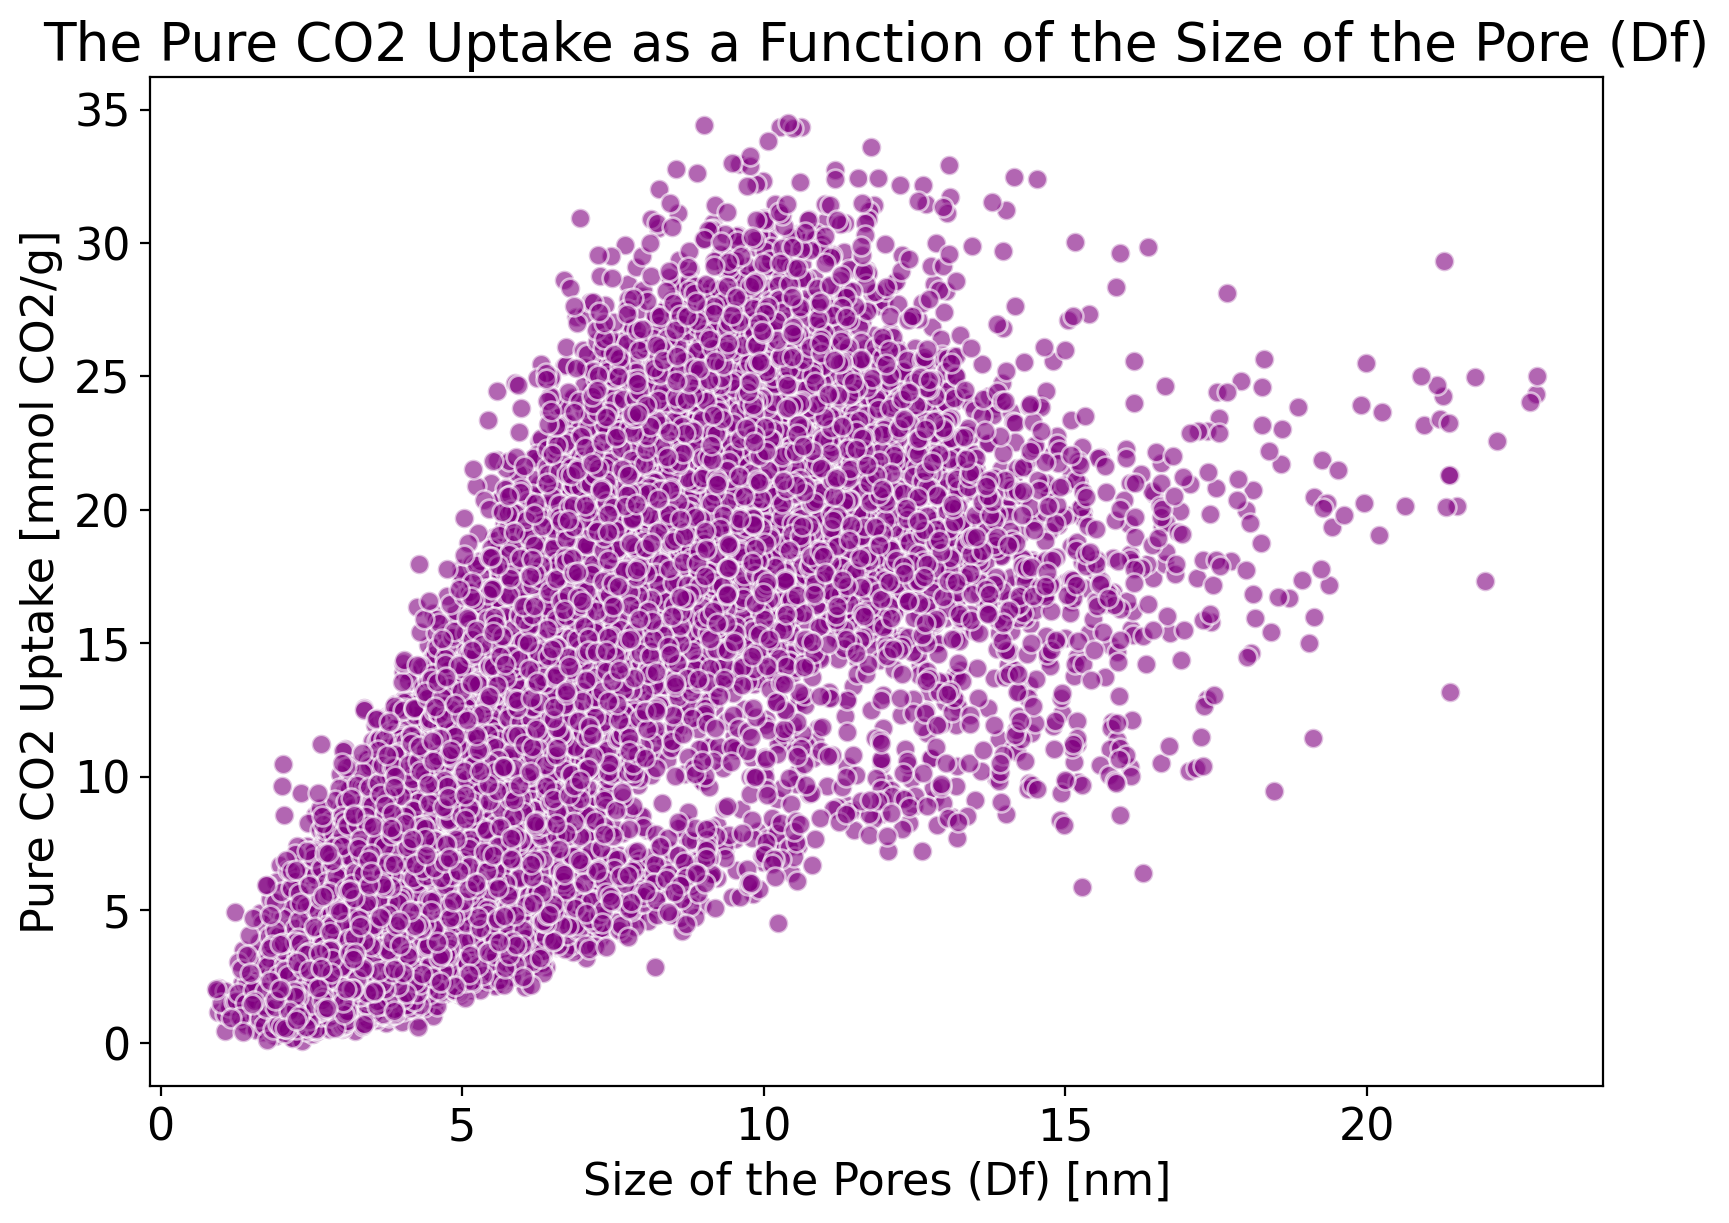

In [14]:
############# The Pure CO2 Uptake as a Function of the Size of the Pore (Df)


TARGET = 'pure_uptake_CO2_298.00_1600000'

# Define the x and y data
y = df[TARGET]
x = df['Df']

# Create the scatter plot with customizations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='purple', alpha=0.6, edgecolors='w', s=50) 
plt.title('The Pure CO2 Uptake as a Function of the Size of the Pore (Df)')
plt.ylabel('Pure CO2 Uptake [mmol CO2/g]')
plt.xlabel('Size of the Pores (Df) [nm]')
plt.show()

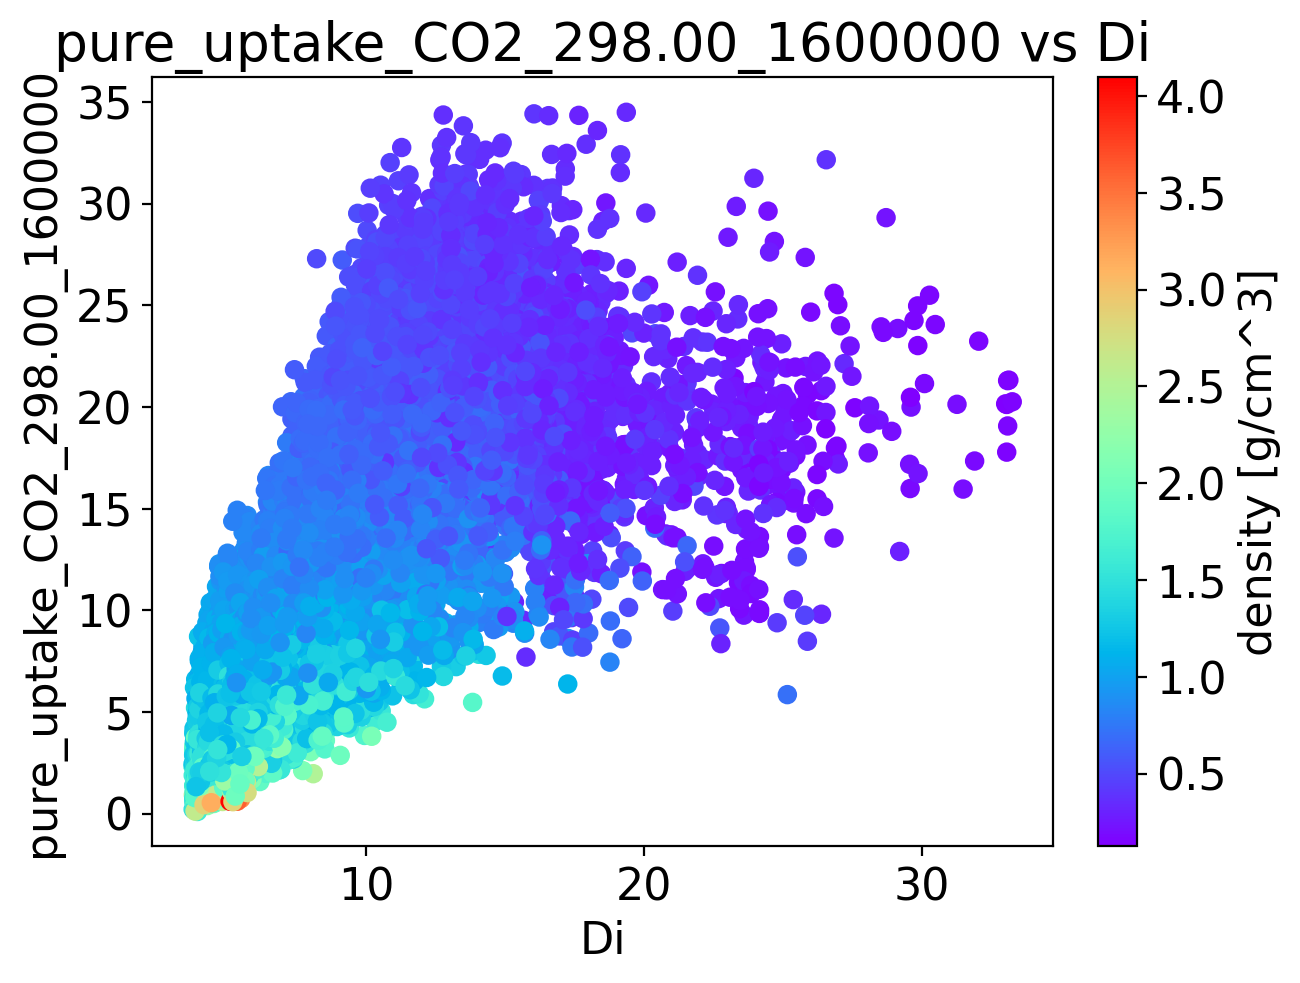

In [15]:
############# The Pure CO2 Uptake and Density as a Function of the Size of the Pore (Di)

plt.scatter(df['Di'], df[TARGET], c=df['density [g/cm^3]'], cmap='rainbow')
plt.colorbar(label='density [g/cm^3]')
plt.xlabel('Di')
plt.ylabel(TARGET)
plt.title(f'{TARGET} vs Di')
plt.show()

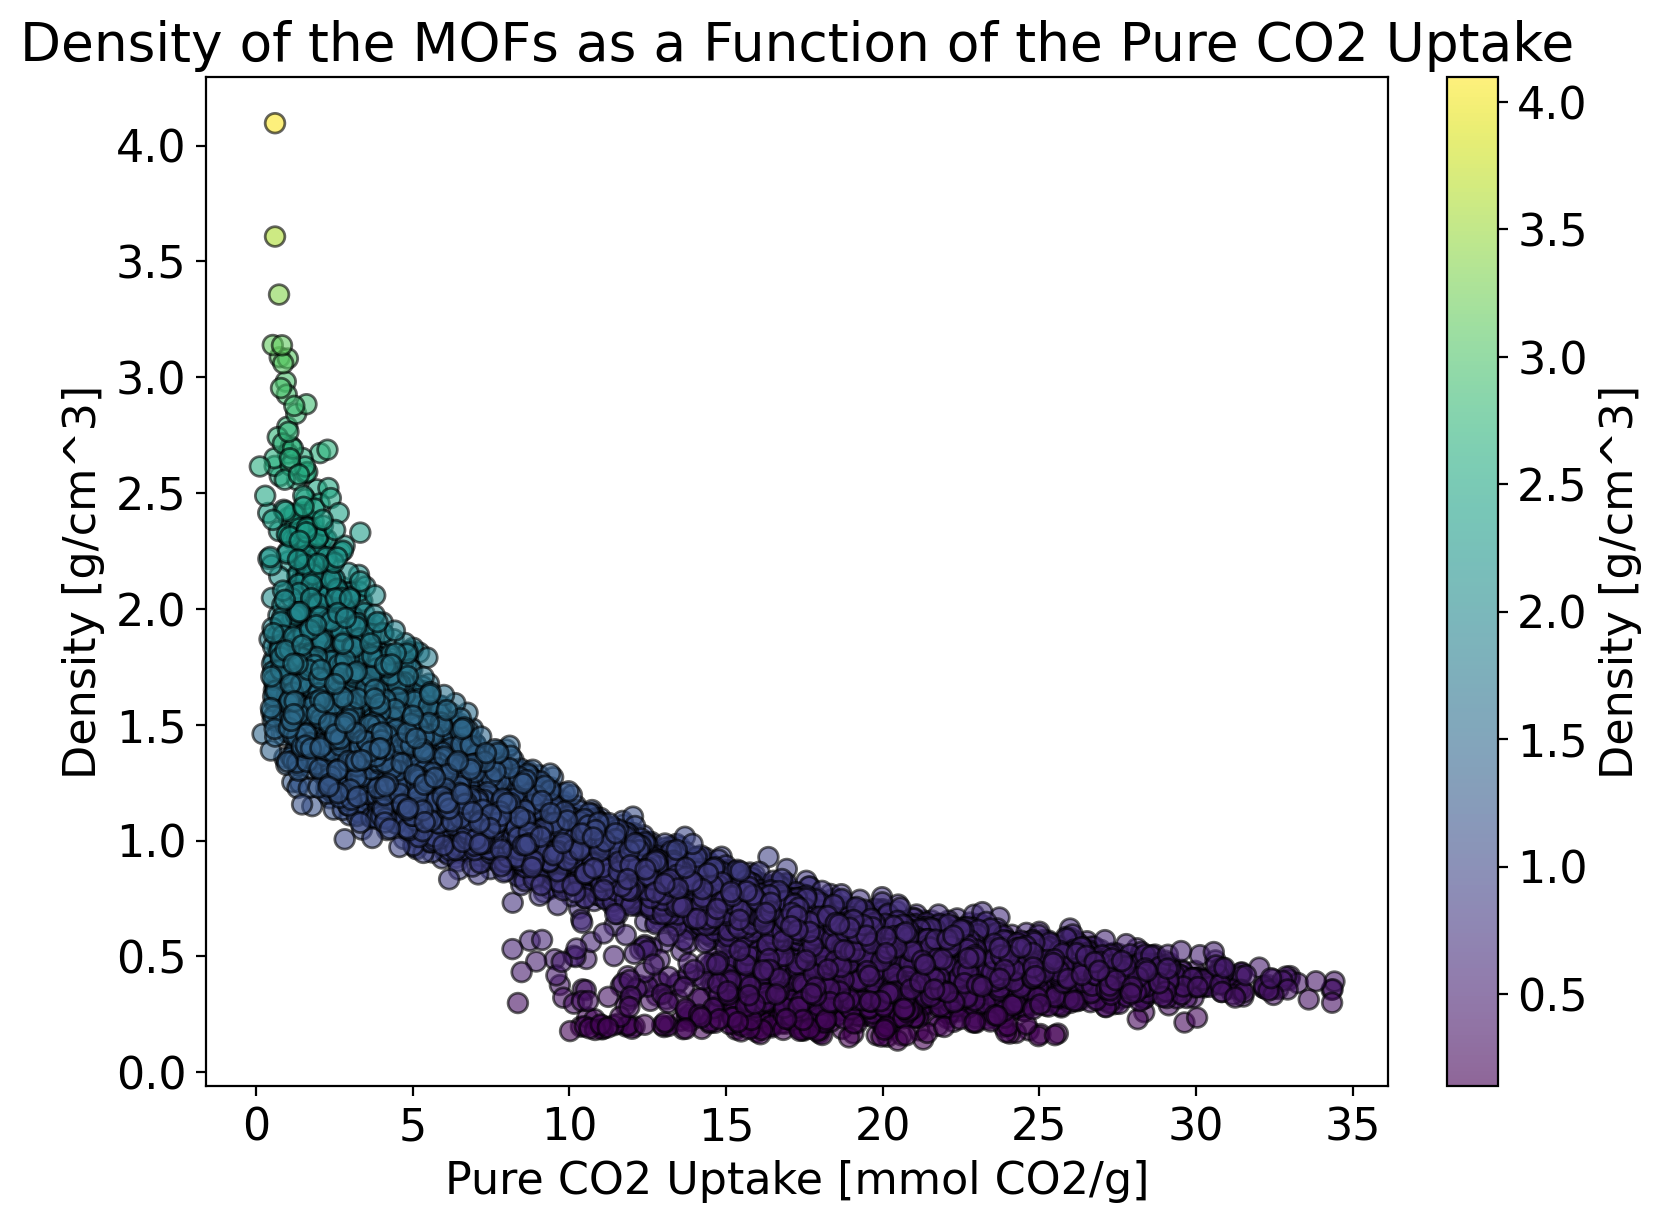

In [16]:
############# The Pure CO2 Uptake as a Function of Density 

# Define x and y data
x = df_train_stratified[TARGET]
y = df_train_stratified['density [g/cm^3]']

# Create the scatter plot with customizations
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=y, cmap='viridis', alpha=0.6, edgecolor='k', s=50) 
plt.title('Density of the MOFs as a Function of the Pure CO2 Uptake')
plt.xlabel('Pure CO2 Uptake [mmol CO2/g]')
plt.ylabel('Density [g/cm^3]')
plt.colorbar(label='Density [g/cm^3]')  #color bar for reference
plt.show()


In [17]:
########### Pearson and Spearman correlation coefficients

df_numeric = df.select_dtypes(include=['float64', 'int64'])
pearson_corr = df_numeric.corr(method='pearson')[TARGET].sort_values(ascending=False)
spearman_corr = df_numeric.corr(method='spearman')[TARGET].sort_values(ascending=False)

print("Top feature of Pearson correlation coefficient:")
print(" ")
print(pearson_corr.head())
print(" ")
print("Top feature of Spearman correlation coefficient:")
print(" ")
print(spearman_corr.head())

Top feature of Pearson correlation coefficient:
 
pure_uptake_CO2_298.00_1600000        1.000000
total_SA_gravimetric                  0.925695
pure_uptake_methane_298.00_6500000    0.921189
total_POV_volumetric                  0.916252
CH4DC                                 0.908832
Name: pure_uptake_CO2_298.00_1600000, dtype: float64
 
Top feature of Spearman correlation coefficient:
 
pure_uptake_CO2_298.00_1600000        1.000000
pure_uptake_methane_298.00_6500000    0.967262
total_POV_gravimetric                 0.956879
total_SA_gravimetric                  0.953690
total_POV_volumetric                  0.940159
Name: pure_uptake_CO2_298.00_1600000, dtype: float64


## 4. Baselines

For machine learning, it is important to have some *baselines* to which one then compares the results of a model. Think of a classification model for some rare disease where we only have 1% postives. A classification model that only predictes the negatives *all the time* will still have a amazingly high accuracy. To be able to understand if our model is really better than such a simple prediction we need to make the simple prediction first. This is what we call a baseline.

A baseline could be a really simple model, a basic heuristic or the current state of the art.
this. We will use a heuristic.

For this we use sklearn `Dummy` objects that simply calculate the mean, the median or the most frequent case of the training set, when you run the `fit()` method on them (which takes the features matrix $\mathbf{X}$ and the labels $\mathbf{y}$ as arguments.
This is, the prediction of a `DummyRegressor` with `mean` strategy will always be the mean, independent of the input (it will not look at the feature matrix!). 

Instead of using those `sklearn` objects you could also just manually compute the the mean or median of the dataset. But we will use those objects as we can learn in this way how to use estimators in `sklearn` and it is also allows you to test your full pipeline with different (baseline) models. 
What does this mean? In practice this means that you can use all the regression and classification models shown in the figure below in the same way, they will all have a `fit()` method that accepts `X` and `y` and a predict method that accepts `X` and returns the predictions. 


<img src="https://scikit-learn.org/stable/assets/ml_map.png" alt="ML Map" width="800"/>

The estimator objects can be always used in the same way 

<img src="https://static.packt-cdn.com/products/9781789800265/graphics/d49a2e95-8f22-42ed-89f1-474b3d028787.png" alt="ML Map" width="400"/>

Using these objects, instead of the mean directly, allows you to easily swap them with other models in pipelines, where one chains many data transformation steps (see section 6).

### 4.1. Build dummy models

$\color{DarkBlue}{\textsf{Short Question}}$
- If you call `.fit(X, y)` on a `DummyRegressor` does it actually use the `X`? If not, why is there still the place for the `X` in the function? If yes, how does it use it?


The DummyRegressor accepts X in its .fit() method but it does not use X in its predictions.
The X parameter is necessary for the API consistency with other estimators in scikit-learn, allowing it to conform to the interface expected of a model, which typically requires both features (X) and target values (y).
The DummyRegressor's functionality focuses on the y values to establish a baseline strategy for predictions. This design allows users to compare more complex models against a straightforward baseline, providing a better understanding of model performance.


$\color{DarkBlue}{\textsf{Short Exercise}}$
- Create [`DummyRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) instances for  `mean`, `median`. (e.g. `dummyinstance = DummyRegressor(strategy='mean')`)
- Train them on the training data (`dummyinstance.fit(df_train[FEATURES], df_train[TARGET])`)

<details>
<summary> <font color='green'>Click here for hints</font></summary>
<ul>
    <li> to create <code>DummyRegressor</code> you can for example use <code> dummyregressor_mean = DummyRegressor(strategy='mean') </code> </li>
    <li> to see the implementation of the <code>DummyRegressor</code> you can check out <a href="https://github.com/scikit-learn/scikit-learn/blob/73732e5a0bc9b72c7049dc699d69aaedbb70ef0a/sklearn/dummy.py#L391"> the source code on GitHub</a> </li>
</ul>
</details>

In [18]:
# Build DummyRegressors
dummyregressor_mean = DummyRegressor(strategy='mean')
dummyregressor_median = DummyRegressor(strategy='median')

In [19]:
# Fit Dummy Regressors
dummyregressor_mean.fit(df_train_stratified[FEATURES], df_train_stratified[TARGET])
dummyregressor_median.fit(df_train_stratified[FEATURES], df_train_stratified[TARGET])

# Print the fitted baseline values for each DummyRegressor
print("Dummy Regressor Mean Prediction (Target Mean):", dummyregressor_mean.constant_[0])
print("Dummy Regressor Median Prediction (Target Median):", dummyregressor_median.constant_[0])

Dummy Regressor Mean Prediction (Target Mean): [11.81172385]
Dummy Regressor Median Prediction (Target Median): [10.43518582]


#### Evaluate the performance of the dummy models

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- Calculate maximum error, mean absolute error and mean square error for the dummy regressors on training and test set. What would you expect those numbers to be?
- Do the actual values surprise you? 
- What does this mean in practice for reporting of metrics/the reasoning behind using baseline models

It can be handy to store our metrics of choice in a nested dictionary ([Python dictionaries are key-value pairs](https://www.tutorialspoint.com/python/python_dictionary.htm)): 

```python
{
    'dummyestimator1': {
                        'metric_a_key': metric_a_value, 
                        'metric_b_key': metric_b_value
                    },
    'dummyestimator2': {
                        'metric_a_key': metric_a_value, 
                        'metric_b_key': metric_b_value
                    },
 }
``` 

You will now write functions `get_regression_metrics(model, X, y_true)` that compute the metrics and return this dictionary for a given model. The `predict` method takes the feature matrix $\mathbf{X}$ as input.

In them, we calculate 

$\mathrm {MAE} =\frac{\sum _{i=1}^{n}\left|Y_{i}-\hat{y}_{i}\right|}{n}.$

and 

$\mathrm {MSE} = {\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.$ 

where $\hat{y}$ are the predictions and, $Y_{i}$ the true values.

as well as the maximum error.

$\color{DarkRed}{\textsf{Answer}}$

- Dummy regressors make predictions based on simple strategies so we expect higher error values since these models do not capture any real patterns in the data

- The actual values show that the metrics are consistent accross training and test sets, the model are then performing equally on both sets. The high error expected are presents, this show that additional data will not improve the model. Like we show before, linear regression are very influenced by outliers. So even more data will eventually "breaks" this model.

- The baseline error metrics provide a sort of point of reference for evaluating performance of more sophisticated models. Any machine learning model used on the same dataset should aim to outperform thi dummy regressors model.

<details>
<summary> <font color='green'>Click here for hints</font></summary>
<ul>
    <li> to perform a prediction using a estimator object, you can call <code> classifier.predict(X) </code> </li>
    <li> to calculate metrics, you can for example call <code>accuracy_score(true_values, predicted_values) </code> </li>
</ul>
</details>

In [20]:
def get_regression_metrics(model, X, y_true):
    """
    Get a dicionary with regression metrics:

    model: sklearn model with predict method
    X: feature matrix
    y_true: ground truth labels
    """
    y_predicted = model.predict(X)

    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    maximum_error = max_error(y_true, y_predicted)

    metrics_dict = {
        'mae': mae,
        'mse': mse,
        'max_error': maximum_error
    }

    return metrics_dict

In [21]:
dummy_regressors = [
    ('mean', dummyregressor_mean),
    ('median', dummyregressor_median)
]

In [22]:
# Initialize empty dictionary
dummy_regressor_results_test = {}
dummy_regressor_results_train = {}

# loop over the dummy_regressor list
# if you have a tuple regressorname, regressor = (a, b) that is automatically expanded into the variables
# a = regressorname, b = regressor
for regressorname, regressor in dummy_regressors:
    print(f"Calculating metrics for {regressorname}")
    dummy_regressor_results_test[regressorname] = get_regression_metrics(regressor, df_test_stratified[FEATURES], df_test_stratified[TARGET])
    dummy_regressor_results_train[regressorname] = get_regression_metrics(regressor, df_train_stratified[FEATURES], df_train_stratified[TARGET])

print(f'Error of test set :{dummy_regressor_results_test}')
print(f'Error of training set :{dummy_regressor_results_train}')

Calculating metrics for mean
Calculating metrics for median
Error of test set :{'mean': {'mae': 6.273193512449095, 'mse': 53.028260136020464, 'max_error': 22.680388292469132}, 'median': {'mae': 6.183175543164301, 'mse': 54.691098290809734, 'max_error': 24.056926324899997}}
Error of training set :{'mean': {'mae': 6.332682697746154, 'mse': 54.361784845677875, 'max_error': 22.60380294886913}, 'median': {'mae': 6.260356674045895, 'mse': 56.256641800406506, 'max_error': 23.980340981299996}}


## 5. Build actual regression models

Let's build a simple [kernel ridge regression (KRR)](https://emtiyaz.github.io/pcml15/kernel-ridge-regression.pdf) machine learning model and train it with our raw data.
You can try different kernels, but we recommend to start with the Gaussian radial basis function ('rbf') kernel.
 
 $\color{DarkBlue}{\textsf{Short Question}}$
- Do you expect this model to perform better than the dummy models?
- Train it and then calculate the performance metrics on the training and test set. How do they compare to the performance of the dummy models?
- What is the shape of the Kernel and of the weights? (you can check your answer by looking at the `dual_coef_` attribute of the KRR instance. You can get shapes of objects using the `shape` atrribute 

$\color{DarkRed}{\textsf{Answer}}$

- As we use a Kernel Ridge Regression with a gaussian radial basis kernel, this model will be capable of capturing nonlinear relationships. So we can expect that it would outperform the dummy models.

- By comparing the data we get, we saw that the Kernel model performs better than the Dummy model on the training set and showing lower errors accross all metrics. However, the Kernel model shows higher errors on the test set.


In [23]:
# Train the model with a Gaussian kernel
krr = KernelRidge(kernel='rbf')
krr.fit(df_train_stratified[FEATURES], df_train_stratified[TARGET]) 

KernelRidge(kernel='rbf')

In [24]:
# get the metrics on the train and the test set using the get_regression_metrics functions (as above)

# Initialize empty dictionary
krr_train_metrics = {} 
krr_test_metrics = {}

# Calculate metrics for training and test sets
krr_train_metrics["krr"] = get_regression_metrics(krr, df_train_stratified[FEATURES], df_train_stratified[TARGET])
krr_test_metrics["krr"] = get_regression_metrics(krr, df_test_stratified[FEATURES], df_test_stratified[TARGET])

# Print the results
print(f'Error of training set : {krr_train_metrics}')
print(f'Error of test set : {krr_test_metrics}')

Error of training set : {'krr': {'mae': 5.893072129396827, 'mse': 48.35125984348649, 'max_error': 17.207763399500003}}
Error of test set : {'krr': {'mae': 11.693722399646836, 'mse': 189.98032695451465, 'max_error': 34.4921121426}}


In [25]:
# Shape of the kernel matrix 
kernel_matrix_shape = krr._get_kernel(df_train_stratified[FEATURES]).shape
print("Shape of Kernel Matrix:", kernel_matrix_shape)

# Shape of the weights
weights_shape = krr.dual_coef_.shape
print("Shape of the weights:", weights_shape)

Shape of Kernel Matrix: (12165, 12165)
Shape of the weights: (12165,)


## 6. Evaluate the model performance in detail

We have trained our first machine learning model!
We'll first have a closer look at its performance, before learning how to improve it.

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- Create a parity plot (true values against predictions)for the training and test data
- Plot a histogram of the distribution of the training and test errors on the training and test set. Plot the errors also as a function of the true value
- Let's assume we would like to use our model for pre-screening a library of millions of porous materials to zoom-in on those with the most promising gas uptake. Could you tolerate the errors of your model?
- Compare the parity plots for this model with the ones for the dummy models. 
Use the plotting functions below the evaluate all the following models you train.

For this exercise, it can be handy to save the results in a dictionary, e.g. 
```(python)
res_train = {
    'y true': [],
    'y pred': []
}
```

<details>
<summary> <font color='green'>Click here for hints for plotting</font></summary>
<ul>
    <li> If you want to use matplotlib to make the parity plots, you can use the <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist2d.html">hist2d function</a> </li>
    <li> To create the frequencies and the edges of a histogram, one can use <code>np.histogram</code></li>
</ul>
</details>

In [26]:
# Create dictionaries with training and test results to create parity plots
res_train = {
    'y true': df_train_stratified[TARGET],
    'y pred': krr.predict(df_train_stratified[FEATURES])
}

res_test = {
    'y true': df_test_stratified[TARGET],
    'y pred': krr.predict(df_test_stratified[FEATURES])
}

Now, lets calculate the errors

In [27]:
res_train["error"] = res_train["y true"] - res_train["y pred"]
res_test["error"] = res_test["y true"] - res_test["y pred"]

Now, plot the parity plots and error distributions

<details>
<summary> <font color='green'>Click here for hints for plotting</font></summary>
If you want interactive plots, you can use the following code:
<pre><code>
hv.extension("bokeh")
hex_train = hv.HexTiles(res_train, ["y true", "y pred"]).hist(
    dimension=["y true", "y pred"]
)
hex_test = hv.HexTiles(res_test, ["y true", "y pred"]).hist(
    dimension=["y true", "y pred"]
)
hex_train + hex_test
</code>
</details>

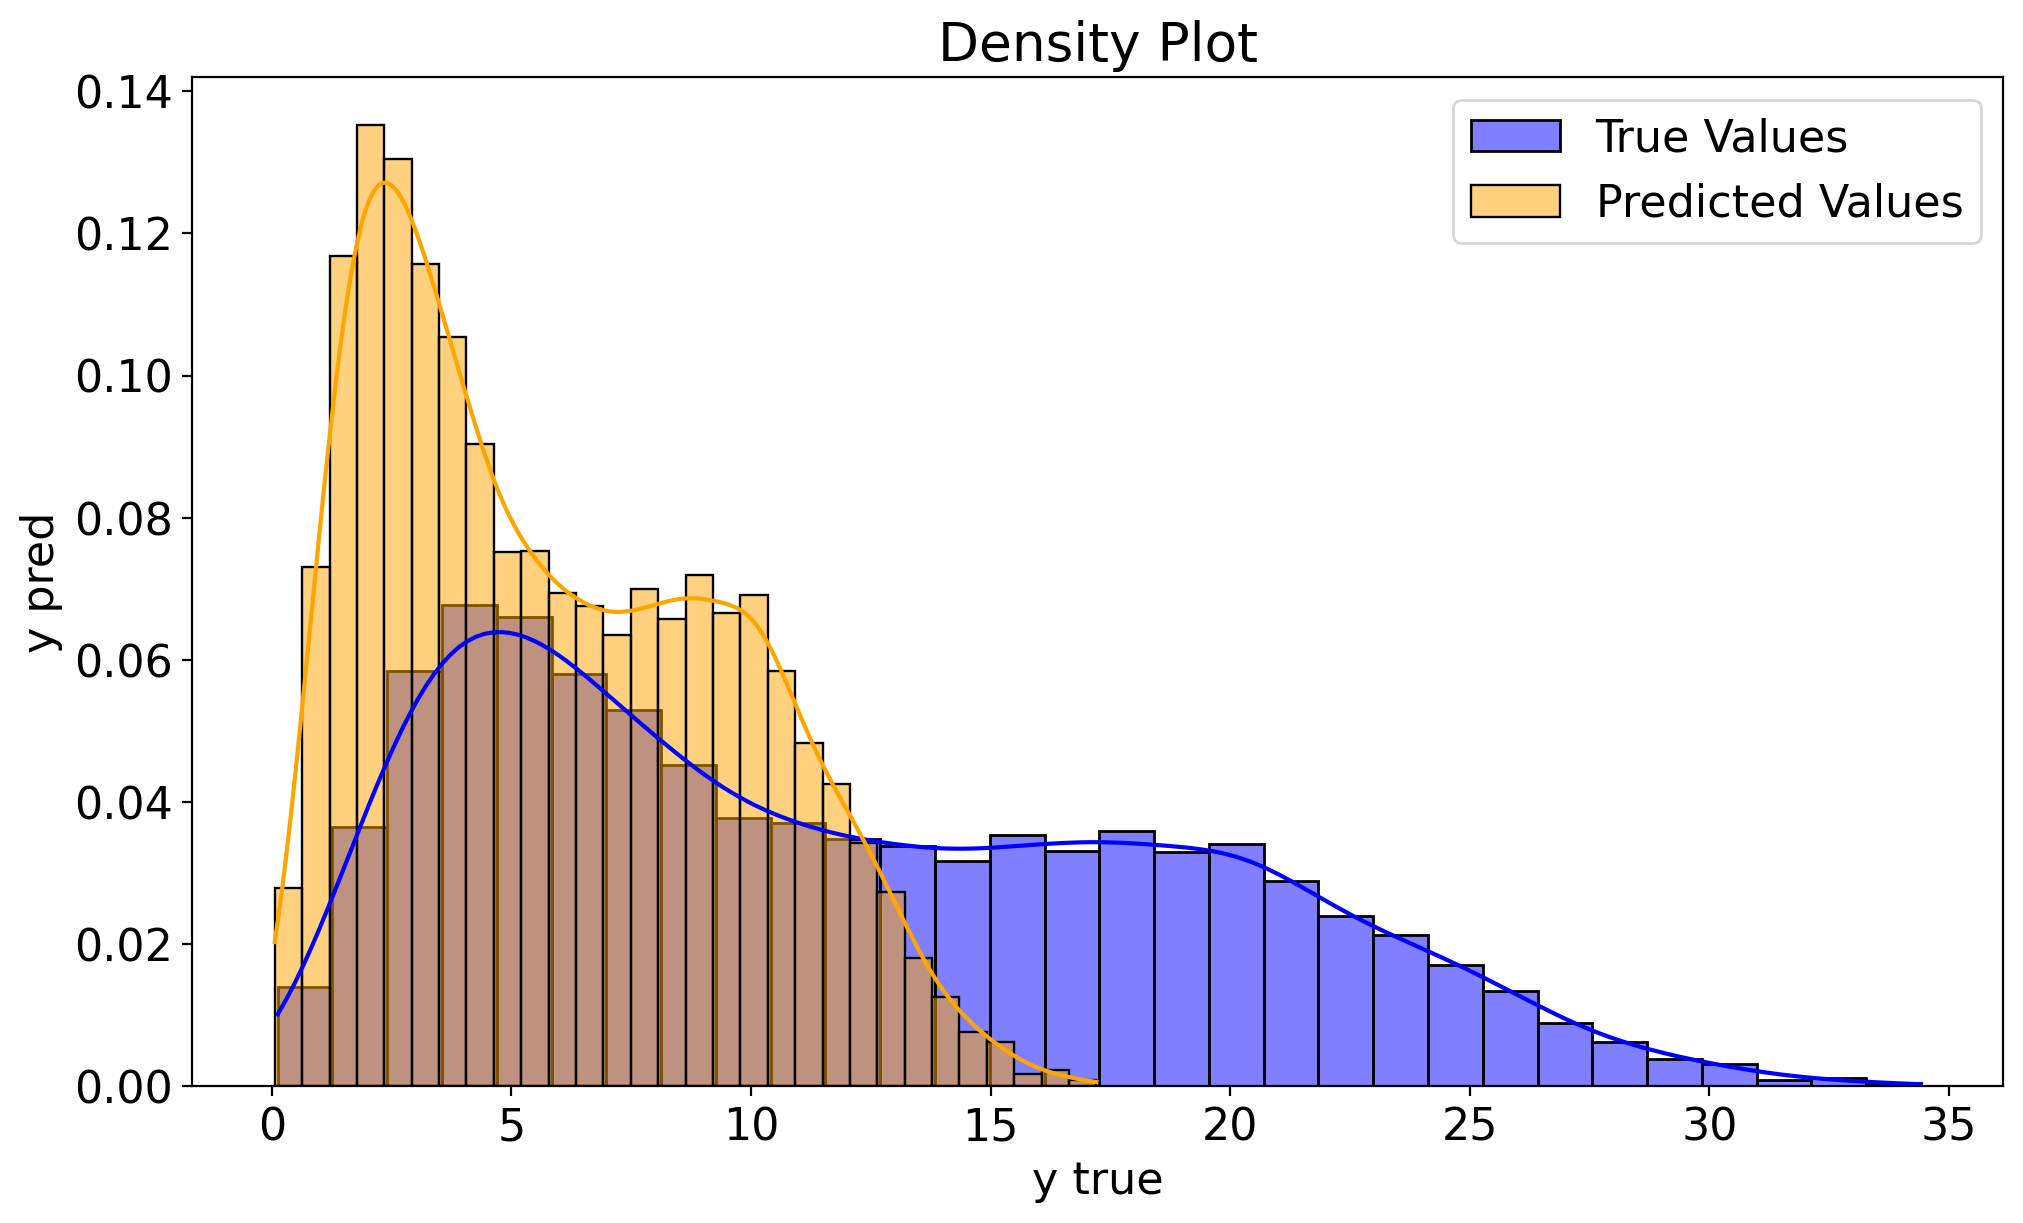

In [28]:
def hist_density(true_values, predicted_values, xlabel='True Values', ylabel='Density', title='Density Plot'):
    plt.figure(figsize=(10, 6))
    
    # Plotting the histogram for true values
    sns.histplot(true_values, color='blue', kde=True, label='True Values', stat='density', bins=30, alpha=0.5)
    
    # Plotting the histogram for predicted values
    sns.histplot(predicted_values, color='orange', kde=True, label='Predicted Values', stat='density', bins=30, alpha=0.5)
    
    plt.xlabel(xlabel)  # Setting x-label
    plt.ylabel(ylabel)  # Setting y-label
    plt.title(title)     # Setting plot title
    plt.legend()
    plt.show()

    # plot it
hist_density(res_train['y true'], res_train['y pred'], xlabel='y true', ylabel='y pred', title='Density Plot')

/var/folders/cf/ht15l8z144d0kzyr8gqdpx2c0000gn/T/ipykernel_10621/2098782127.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


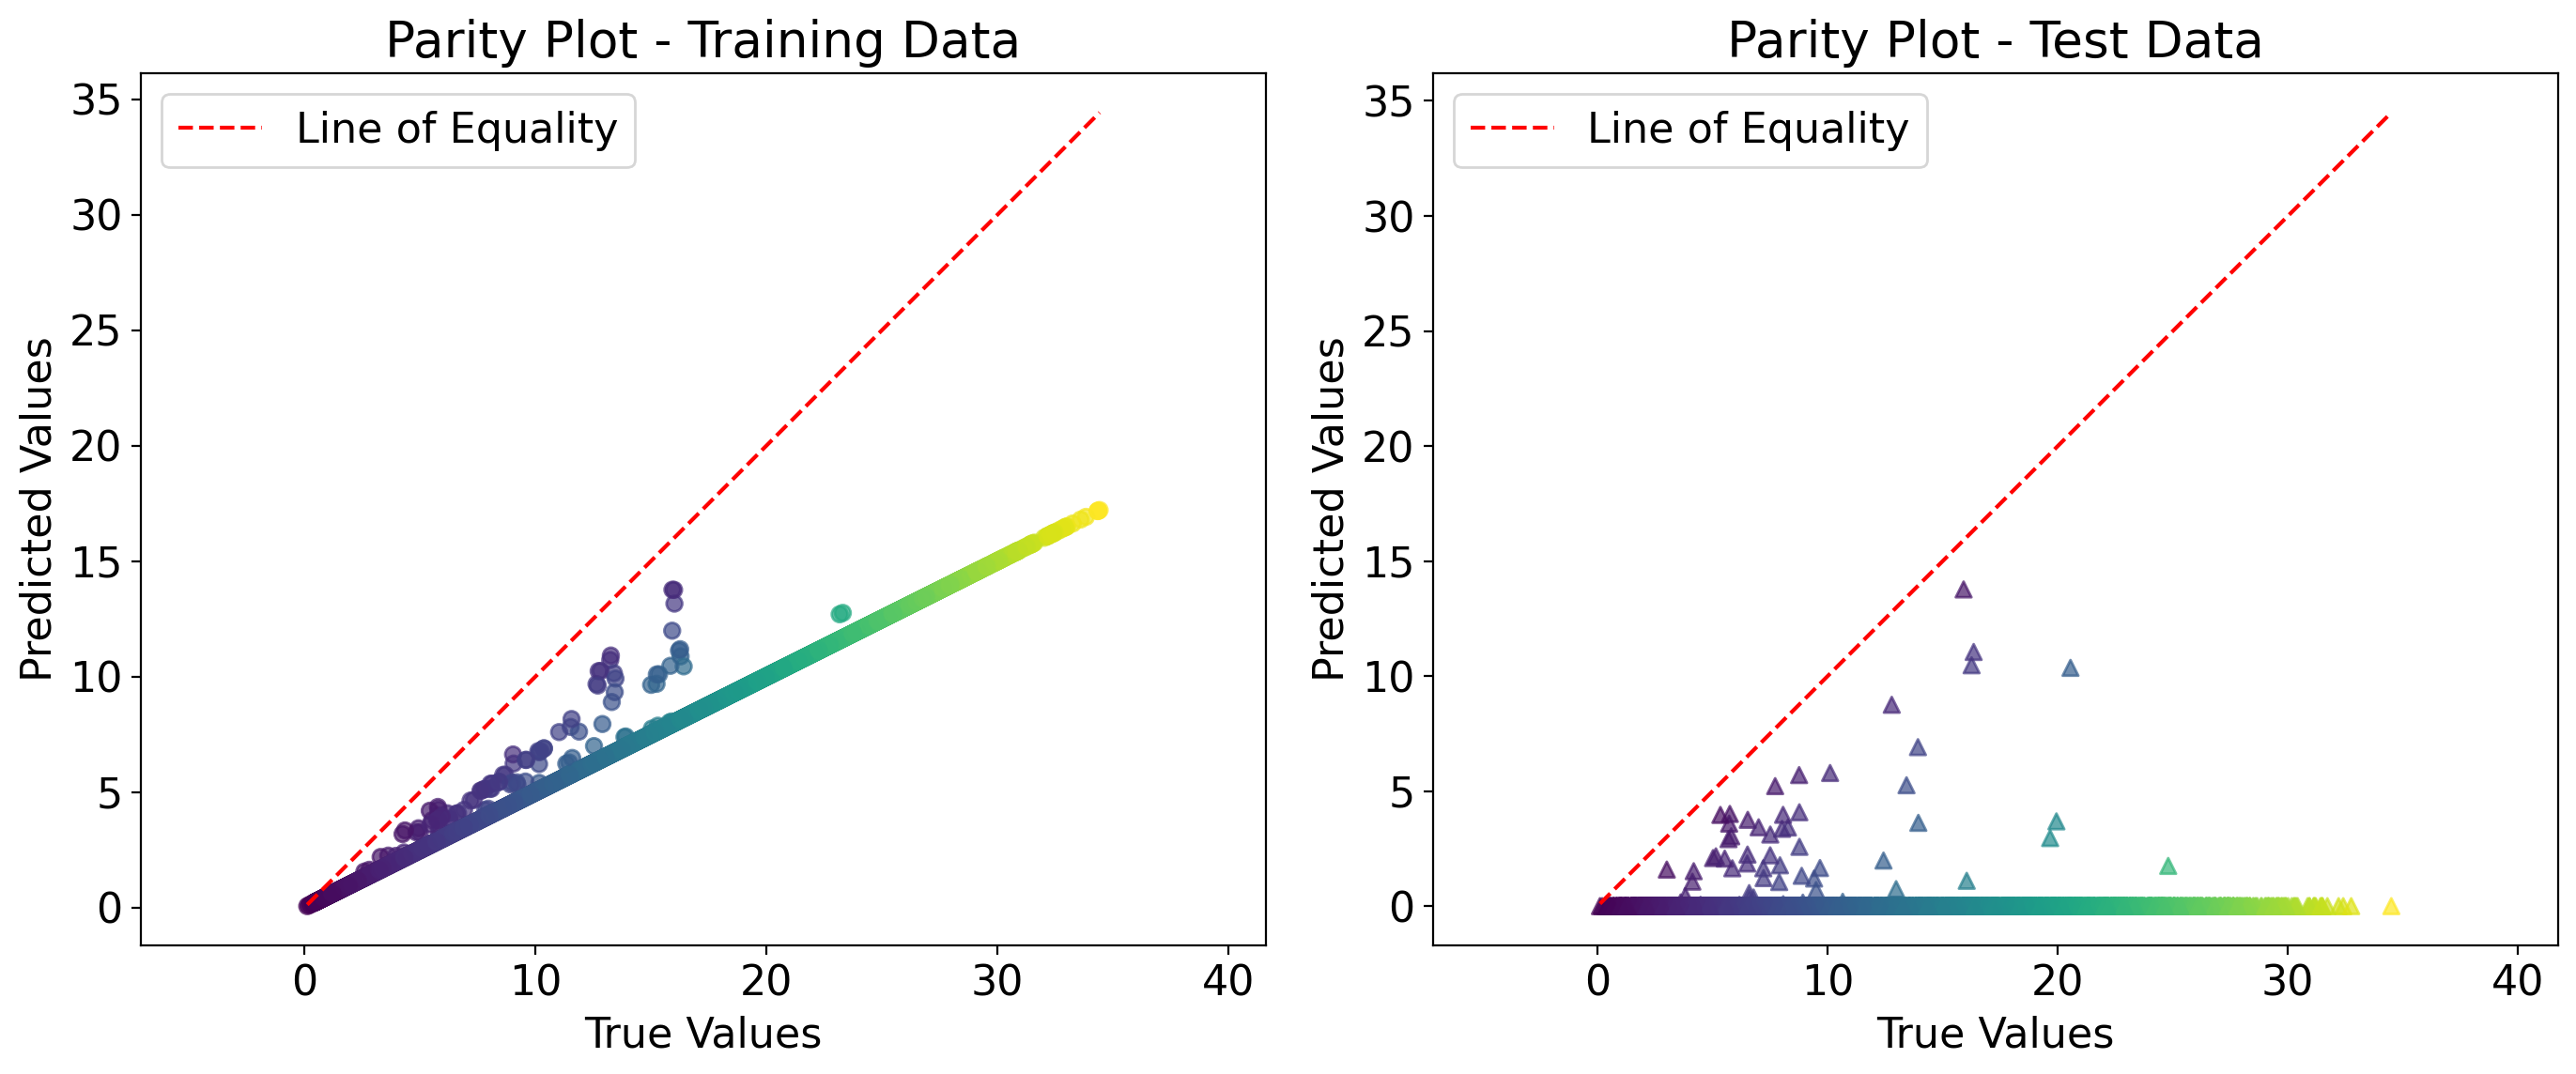

/var/folders/cf/ht15l8z144d0kzyr8gqdpx2c0000gn/T/ipykernel_10621/2098782127.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


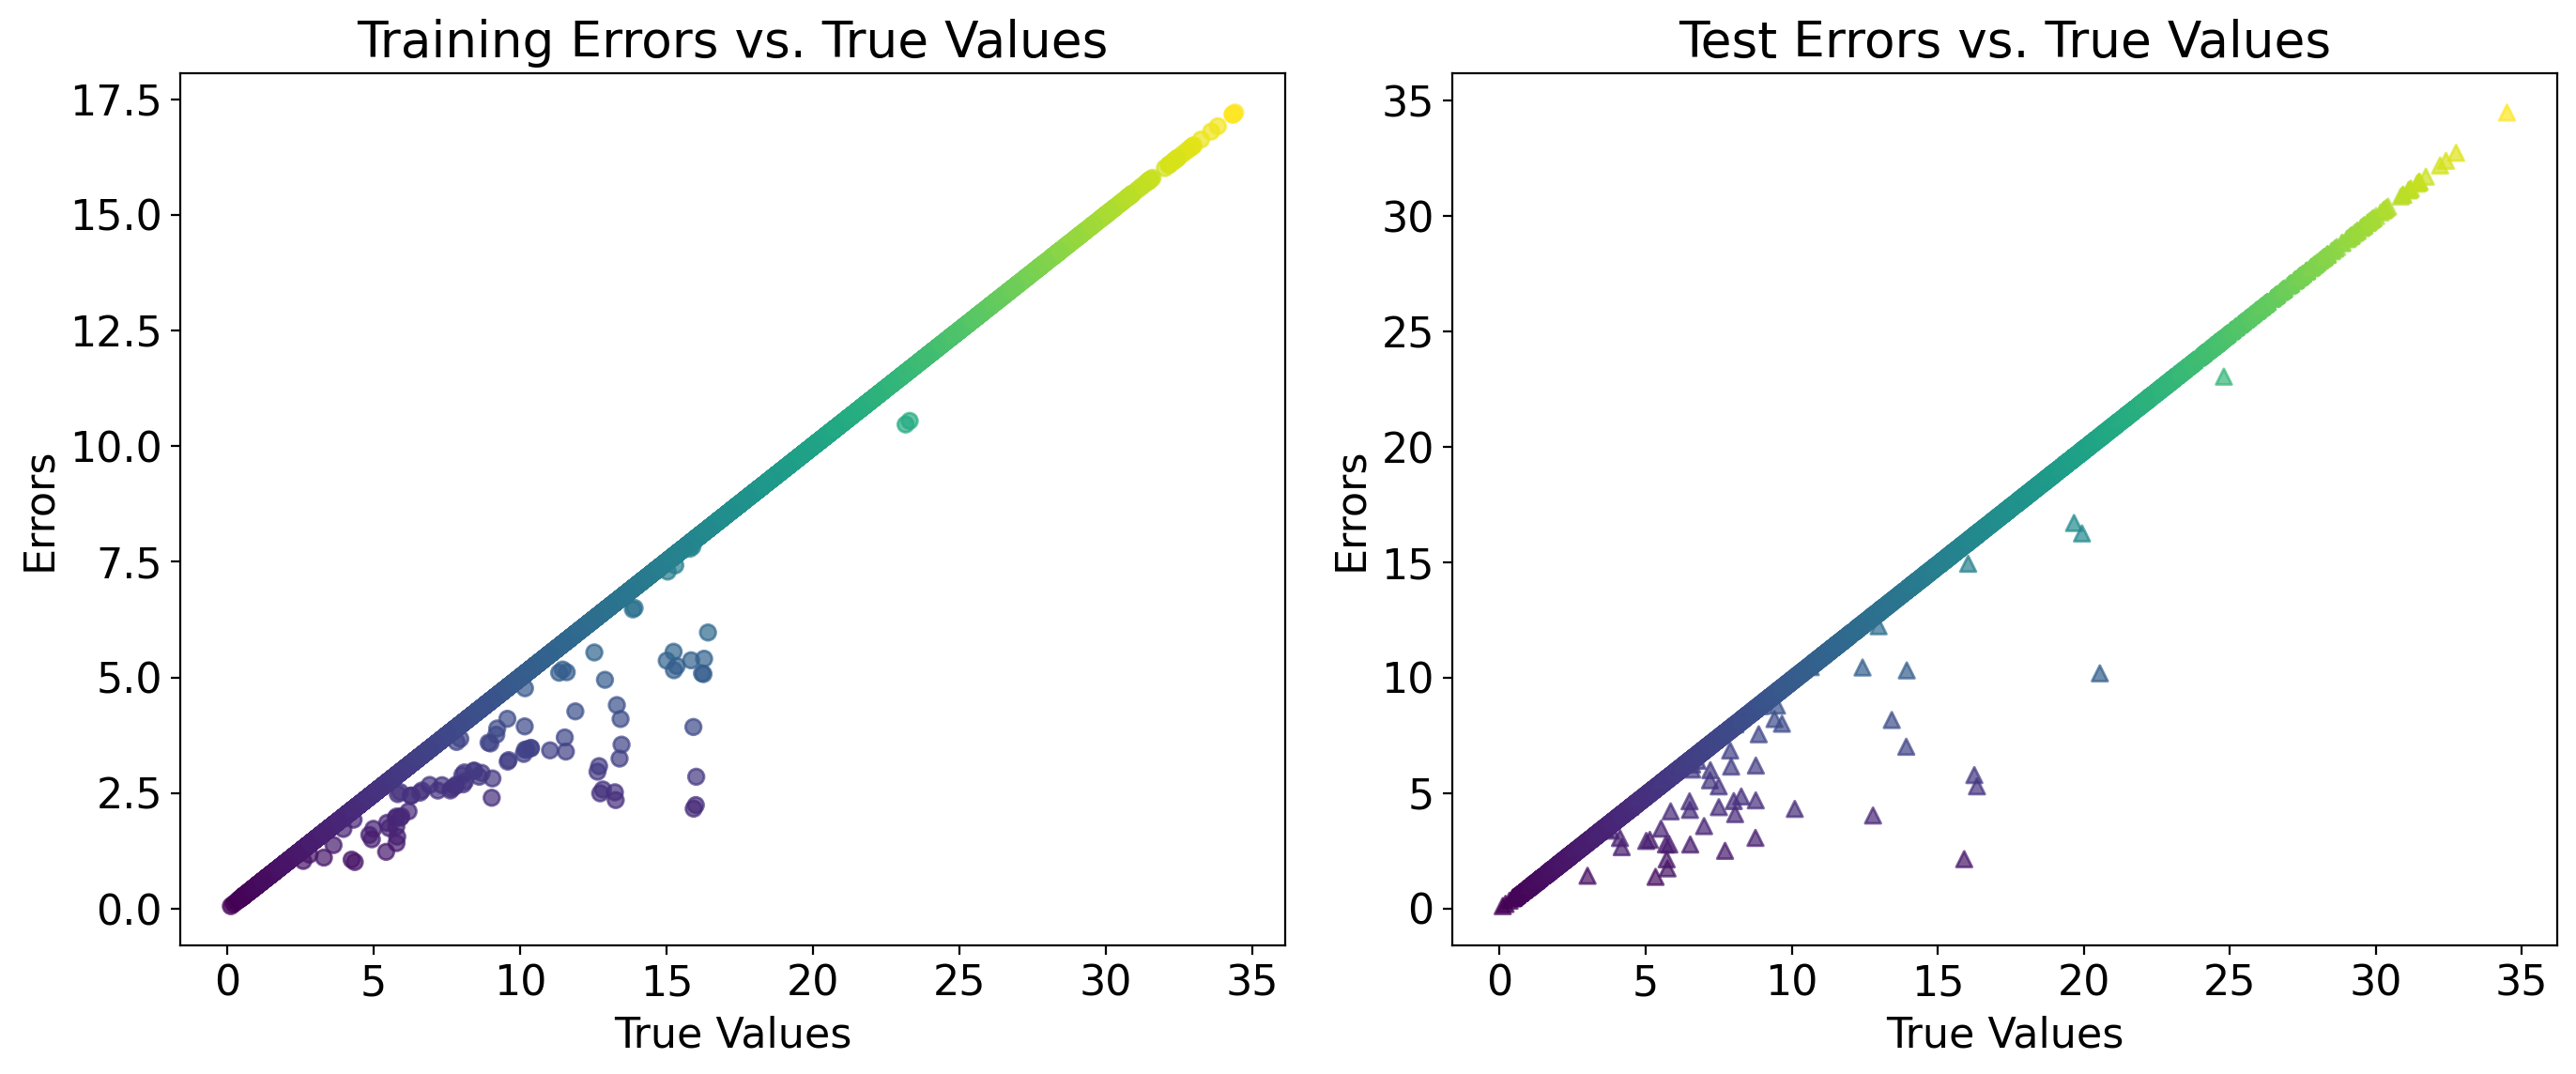

In [29]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Parity Plot for Training Data with Color Gradient based on Error
sc1 = axs[0].scatter(res_train['y true'], res_train['y pred'], 
                     alpha=0.7, 
                     c=res_train['error'], cmap='viridis',  # Color map 
                     marker='o')  # Circle markers
axs[0].plot([res_train['y true'].min(), res_train['y true'].max()],
            [res_train['y true'].min(), res_train['y true'].max()],
            color='red', linestyle='--', label='Line of Equality')
axs[0].set_title('Parity Plot - Training Data')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].legend()
axs[0].axis('equal')  # Ensure equal scaling

# Parity Plot for Testing Data with Color Gradient based on Error
sc2 = axs[1].scatter(res_test['y true'], res_test['y pred'], 
                     alpha=0.7, 
                     c=res_test['error'], cmap='viridis',  # Color map based on 'error'
                     marker='^')  # Triangle markers
axs[1].plot([res_test['y true'].min(), res_test['y true'].max()],
            [res_test['y true'].min(), res_test['y true'].max()],
            color='red', linestyle='--', label='Line of Equality')
axs[1].set_title('Parity Plot - Test Data')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
axs[1].legend()
axs[1].axis('equal')  # Ensure equal scaling

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# visualize the errors as a function of true values with color gradient
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Errors vs. True Values for Training Data with Color Gradient based on Error
sc3 = axs[0].scatter(res_train['y true'], res_train['error'], 
                     alpha=0.7, 
                     c=res_train['error'], cmap='viridis',  # Color map based on 'error'
                     marker='o')  # Circle markers
axs[0].set_title('Training Errors vs. True Values')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Errors')

# Errors vs. True Values for Testing Data with Color Gradient based on Error
sc4 = axs[1].scatter(res_test['y true'], res_test['error'], 
                     alpha=0.7, 
                     c=res_test['error'], cmap='viridis',  # Color map based on 'error'
                     marker='^')  # Triangle markers
axs[1].set_title('Test Errors vs. True Values')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Errors')

# Adjust layout
plt.tight_layout()

# Show the error plots
plt.show()

## 7. Improve the model 

Our training set still has a couple of issues you might have noticed:
- The feature values are not scaled (different features are measured in different units ...)
- Some features are basically constant, i.e. do not contain relevant information and just increase the dimensionality of the problem 
- Some feature distributions are skewed (which is more relevant for some models than for others ...)

$\color{DarkBlue}{\textsf{Short Question}}$
- Why might the scaling of the features be relevant for a machine learning model? 

$\color{Red}{\textsf{Answer}}$

Many machine learning algorithms are sensitive to the scale of the features because they rely on distance metrics. If one feature has a much larger range than others, it can disproportionately influence the model’s performance. 

In some models, particularly linear models, scaling features can help in interpreting the model coefficients more effectively. When features are on the same scale, the coefficients can be compared more directly, helping to identify which features are most influential in making predictions.

### 7.1. Standard scaling and building a first pipeline 

Given that we will now go beyond training a single model, we will build [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), which are objects that can collect a selection of transformations and estimators. This makes it quite easy to apply the same set of operations to different datasets. A simple pipeline might be built as follows 

<img src="https://vitalflux.com/wp-content/uploads/2020/08/ML-Pipeline-Page-2-1024x307.png" alt="Pipeline" width="800"/>



 $\color{DarkBlue}{\textsf{Short Exercise}}$
- Build a pipline that first performs standard scaling and then fits a KRR. Call it `pipe_w_scaling`. 
- Fit it on the training set 
- Make predictions, calculate the errors and make the parity plots

<details>
<summary> <font color='green'>Click here for hints</font></summary>
<ul>
    <li> the <code>fit</code>, <code>predict</code> methods also work for pipelines </li>
</ul>
</details>

In [30]:
pipe_w_scaling = Pipeline(
    [
        ('scaling', StandardScaler()),       #Scaling the features
        ('krr', KernelRidge(kernel='rbf'))               #Applying Kernel Ridge Regression
    ]
)

In [31]:
#Fit the pipeline to the training set 
pipe_w_scaling.fit(df_train_stratified[FEATURES], df_train_stratified[TARGET])

Pipeline(steps=[('scaling', StandardScaler()),
                ('krr', KernelRidge(kernel='rbf'))])

/var/folders/cf/ht15l8z144d0kzyr8gqdpx2c0000gn/T/ipykernel_10621/3615635823.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


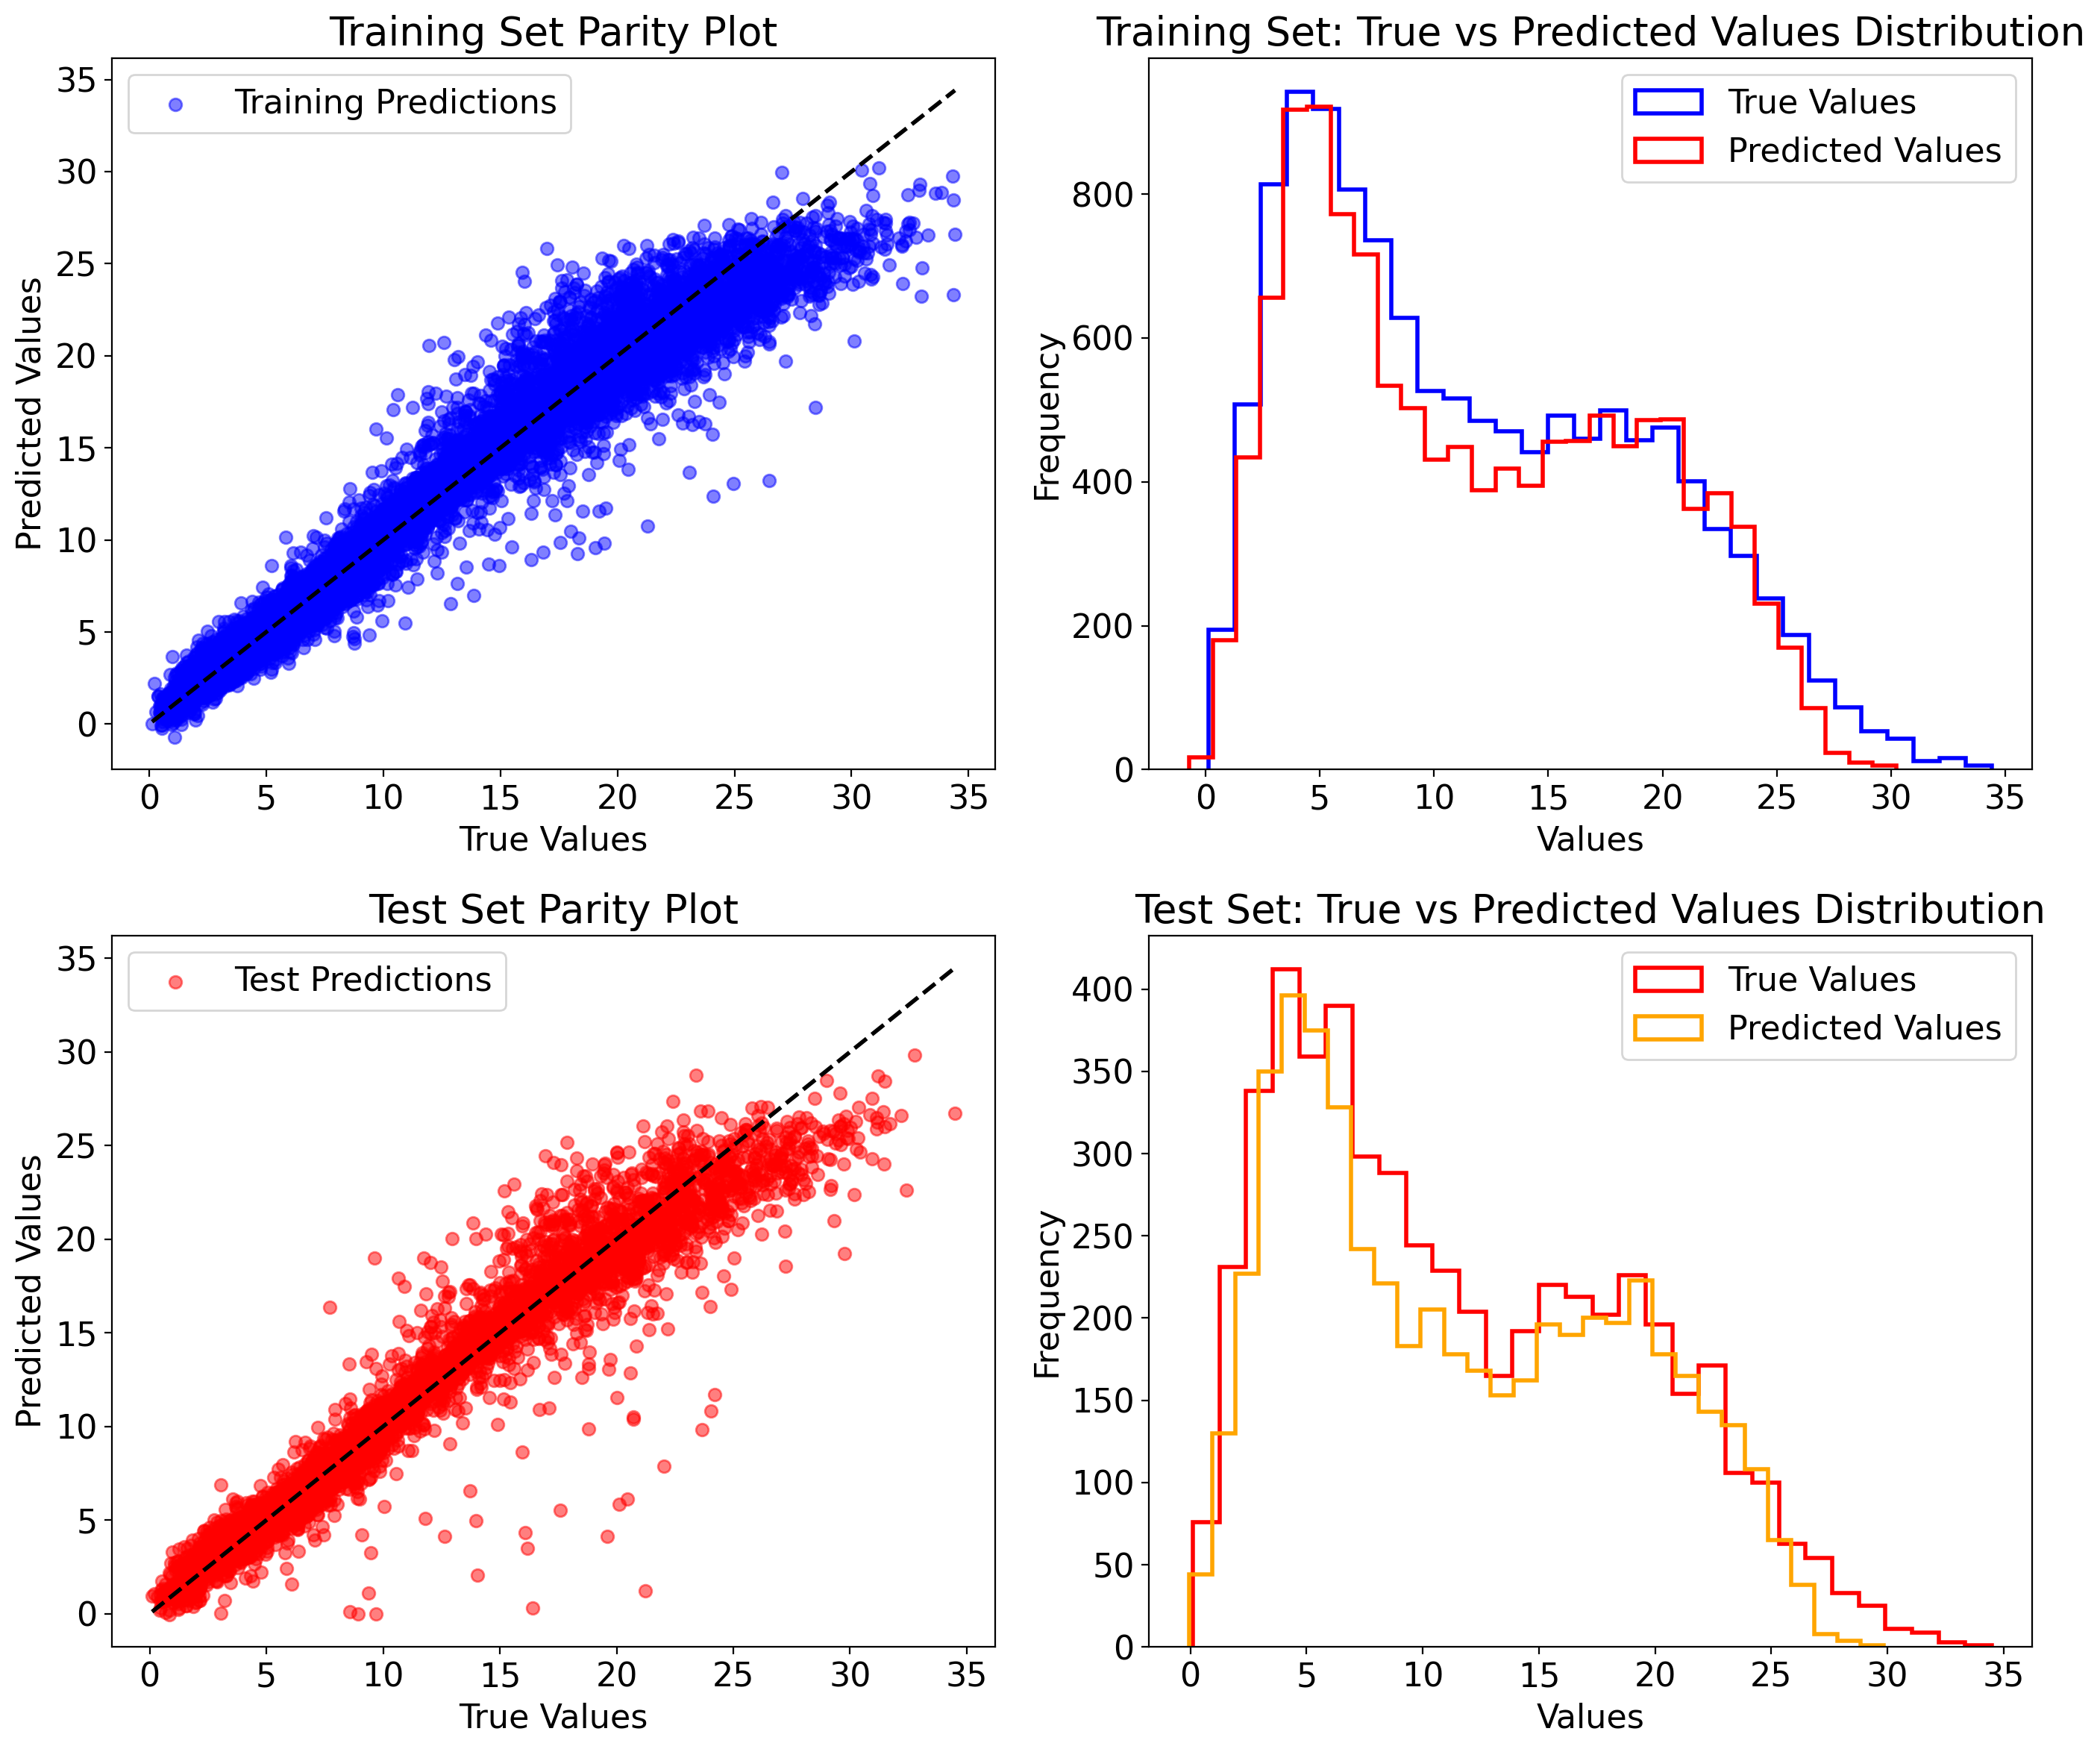

In [32]:
# Step 1: Make predictions using the fitted pipeline
y_train_pred = pipe_w_scaling.predict(df_train_stratified[FEATURES])
y_test_pred = pipe_w_scaling.predict(df_test_stratified[FEATURES])

# Step 2: Calculate errors
train_errors = df_train_stratified[TARGET] - y_train_pred
test_errors = df_test_stratified[TARGET] - y_test_pred

# Step 3: Create parity plots with histograms
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Training set parity plot
axs[0, 0].scatter(df_train_stratified[TARGET], y_train_pred, alpha=0.5, color='blue', label="Training Predictions")
axs[0, 0].plot([df_train_stratified[TARGET].min(), df_train_stratified[TARGET].max()],
               [df_train_stratified[TARGET].min(), df_train_stratified[TARGET].max()], 
               'k--', lw=2)
axs[0, 0].set_xlabel("True Values")
axs[0, 0].set_ylabel("Predicted Values")
axs[0, 0].set_title("Training Set Parity Plot")
axs[0, 0].legend()

# Training set histogram (True vs Predicted) without filling the bars
axs[0, 1].hist(df_train_stratified[TARGET], bins=30, histtype='step', color='blue', linewidth=2, label="True Values")
axs[0, 1].hist(y_train_pred, bins=30, histtype='step', color='red', linewidth=2, label="Predicted Values")
axs[0, 1].set_xlabel("Values")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("Training Set: True vs Predicted Values Distribution")
axs[0, 1].legend()

# Test set parity plot
axs[1, 0].scatter(df_test_stratified[TARGET], y_test_pred, alpha=0.5, color='red', label="Test Predictions")
axs[1, 0].plot([df_test_stratified[TARGET].min(), df_test_stratified[TARGET].max()],
               [df_test_stratified[TARGET].min(), df_test_stratified[TARGET].max()], 
               'k--', lw=2)
axs[1, 0].set_xlabel("True Values")
axs[1, 0].set_ylabel("Predicted Values")
axs[1, 0].set_title("Test Set Parity Plot")
axs[1, 0].legend()

# Test set histogram (True vs Predicted) without filling the bars
axs[1, 1].hist(df_test_stratified[TARGET], bins=30, histtype='step', color='red', linewidth=2, label="True Values")
axs[1, 1].hist(y_test_pred, bins=30, histtype='step', color='orange', linewidth=2, label="Predicted Values")
axs[1, 1].set_xlabel("Values")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("Test Set: True vs Predicted Values Distribution")
axs[1, 1].legend()

# Adjust layout for better display
plt.tight_layout()

# Show the plots
plt.show()


### 7.2. Hyperparameter optimization

A key component we did not optimize so far are hyperparameters. Those are parameters of the model that we usually cannot learn from the data but have to fix before we train the model. 
Since we cannot learn those parameters it is not trivial to select them. Hence, what we typically do in practice is to create another set, a "validation set", and use it to test models trained with different hyperparameters.

The most common approach to hyperparameter optimization is to define a grid of all relevant parameters and to search over the grid for the best model performance.

$\color{DarkBlue}{\textsf{Short Exercise}}$
- Think about which parameters you could optimize in the pipeline. Note that your KRR model has two parameters you can optimize. You can also switch off some steps by setting them to `None'.
- For each parameter you need to define a resonable grid to search over.
- Recall, what k-fold cross-validation does. Run the hyperparameter optimization using 5-fold cross-validation (you can adjust the number of folds according to your computational resources/impatience. It turns out at k=10 is the [best tradeoff between variance and bias](https://arxiv.org/abs/1811.12808)). 
Tune the hyperparameters until you are statisfied (e.g., until you cannot improve the cross validated error any more)
- Why don't we use the test set for hyperparameter tuning but instead test on the validation set? 
- Evaluate the model performance by calculating the performance metrics (MAE, MSE, max error) on the training and the test set.
- *Optional:* Instead of grid search, try to use random search on the same grid (`RandomizedSearchCV`) and fix the number of evaluations (`n_iter`) to a fraction of the number of evaluations of grid search. What do you observe and conclude?

$\color{Red}{\textsf{Answers}}$

- We use the test set to evaluate the performance of the model, thus we can not use it to tune the hyperparameters. It would be data leakage, this is why we define a validation set.

 $\color{DarkRed}{\textsf{Tips}}$
- If you want to see what is happening, set the `verbosity` argument of the `GridSearchCV` object to a higher number.
 
- If you want to speed up the optimization, you can run it in parallel by setting the `n_jobs` argument to the number of workers. If you set it to -1 it will use all available cores. *Using all cores might freeze your computer if you do not have enough memory*
 
- If the optimization is too slow, reduce the number of data points in your set, the number of folds or the grid size. Note that it can also be a feasible strategy to first use a coarser grid and the a finer grid for fine-tuning.

- For grid search, you need to define a parameter grid, which is a dictionary of the following form: 
```(python)
param_grid = {
                    'pipelinestage__parameter': np.logspace(-4,1,10),
                    'pipelinestage': [None, TransformerA(), TransformerB()]
            }
```

- After the search, you can access the best model with `.best_estimator_` and the best parameters with `.best_params_` on the GridSearchCV instance. For example `grid_krr.best_estimator_`

- If you initialize the GridSearchCV instance with `refit=True` it will automatically train the model with all training data (and not only the training folds from cross-validations)

The double underscore (dunder) notation works recursively and specifies the parameters for any pipeline stage. 
For example, `ovasvm__estimator__cls__C` would specifiy the `C` parameter of the estimator in the one-versus-rest classifier `ovasvm`. 

You can print all parameters of the pipeline using `print(sorted(pipeline.get_params().keys()))`

<div class="alert alert-block alert-warning">
Be aware that tight grids will drastically increase the number of experiments you will run! In some cases, it can be useful to perform the optimization in steps, i.e., first use a coarse grid and then refine in interesting regions. 
Alternatively, there are approached like <a href="https://www.jmlr.org/papers/volume18/16-558/16-558.pdf"> hyperband <a> that dynamically adjust the number of data points.
</div>

<details>
<summary> <font color='green'>Click here for hints about pipelines and grid search</font></summary>
<ul>
    <li> You can use the <code>np.logspace</code> function to generate a grid for values that you want to vary on a logarithmic scale </li>
    <li> There are two hyperparameters for KRR: the regularization strength <code>alpha</code> and the Gaussian width  <code>gamma</code> </li>
    <li> For the regularization strength, values between 1 and 1e-3 can be reasonable. For gamma you can use the median heuristic, gamma = 1 / median, or values between 1e-3 and 1e3</li>
</ul>
</details>

In [33]:
# Define the parameter grid and the grid search object
param_grid = {
                    'scaling': [MinMaxScaler(), StandardScaler()], # test different scaling methods
                    'krr__alpha': np.logspace(-3, 0, 4),   # Regularization strength from 1e-3 to 1 
                    'krr__gamma': np.logspace(-3, 3, 7),   # Gamma values from 1e-3 to 1e3 
            }

# Define the grid search object
grid_krr = GridSearchCV(
    estimator=pipe_w_scaling,       # The pipeline to search over
    param_grid=param_grid,          # The parameter grid to optimize
    cv=2,                            # Number of folds for cross-validation
    verbose=2,                       # Verbosity level
    n_jobs=2                         # Use two cores for parallel processing
)

# Optional: Define the random search object
#random_krr = RandomizedSearchCV(
    #estimator=pipe_w_scaling,       # The pipeline to search over
    #param_distributions=param_grid,  # The parameter grid to sample from
    #n_iter=20,                       # Number of evaluations (this can be a fraction of grid size)
    #cv=5,                            # Number of folds for cross-validation
    #verbose=2,                       # Verbosity level
    #n_jobs=2                         # Use two cores for parallel processing
#)

In [34]:
# run the grid search by calling the fit method

grid_krr.fit(df_train_stratified[FEATURES], df_train_stratified[TARGET])

Fitting 2 folds for each of 56 candidates, totalling 112 fits
[CV] END krr__alpha=0.001, krr__gamma=0.001, scaling=MinMaxScaler(); total time=   6.4s
[CV] END krr__alpha=0.001, krr__gamma=0.001, scaling=MinMaxScaler(); total time=   6.4s
[CV] END krr__alpha=0.001, krr__gamma=0.001, scaling=StandardScaler(); total time=   7.4s
[CV] END krr__alpha=0.001, krr__gamma=0.001, scaling=StandardScaler(); total time=   7.4s
[CV] END krr__alpha=0.001, krr__gamma=0.01, scaling=MinMaxScaler(); total time=   7.5s
[CV] END krr__alpha=0.001, krr__gamma=0.01, scaling=MinMaxScaler(); total time=   7.5s
[CV] END krr__alpha=0.001, krr__gamma=0.01, scaling=StandardScaler(); total time=   7.8s
[CV] END krr__alpha=0.001, krr__gamma=0.01, scaling=StandardScaler(); total time=   7.8s
[CV] END krr__alpha=0.001, krr__gamma=0.1, scaling=MinMaxScaler(); total time=   7.2s
[CV] END krr__alpha=0.001, krr__gamma=0.1, scaling=MinMaxScaler(); total time=   7.3s
[CV] END krr__alpha=0.001, krr__gamma=0.1, scaling=Standar

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('krr', KernelRidge(kernel='rbf'))]),
             n_jobs=2,
             param_grid={'krr__alpha': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'krr__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'scaling': [MinMaxScaler(), StandardScaler()]},
             verbose=2)

In [35]:
# get the performance metrics

metrics = get_regression_metrics(grid_krr, df_train_stratified[FEATURES],df_train_stratified[TARGET]) 
print(metrics)
print(grid_krr.best_estimator_)
print(grid_krr.best_params_)
print(sorted(pipe_w_scaling.get_params().keys()))

{'mae': 0.6235301543510142, 'mse': 0.8393054326826735, 'max_error': 6.925115239274291}
Pipeline(steps=[('scaling', MinMaxScaler()),
                ('krr', KernelRidge(alpha=0.001, gamma=0.1, kernel='rbf'))])
{'krr__alpha': 0.001, 'krr__gamma': 0.1, 'scaling': MinMaxScaler()}
['krr', 'krr__alpha', 'krr__coef0', 'krr__degree', 'krr__gamma', 'krr__kernel', 'krr__kernel_params', 'memory', 'scaling', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'steps', 'verbose']


<details>
<summary> <font color='green'>Click here for some more information about hyperparameter optimization</font></summary>
Grid search is not the most efficient way to perform hyperparamter optimization. Even <a href="http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf">random search was shown to be more efficient</a>. Really efficient though are Bayesian optimization approaches like <a href='https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf)'>TPE</a>. This is implemented in the hyperopt library, which is also installed in your conda environment.
</details>

<details>
<summary> <font color='green'>Click here for hyperparameter optimization with hyperopt (advanded and optional outlook)</font></summary>
    
<b>Import the tools we need</b>
<code>
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, mix, rand, anneal, space_eval
from functools import partial
</code>    

<b>Define the grid</b>
<code>
param_hyperopt = {
    "krr__alpha": hp.loguniform("krr__alpha", np.log(0.001), np.log(10)),
    "krr__gamma": hp.loguniform("krr__gamma", np.log(0.001), np.log(10)),
}
</code> 

<b>Define the objective function</b>
<code>
def objective_function(params):
    pipe.set_params(
        **{
            "krr__alpha": params["krr__alpha"],
            "krr__gamma": params["krr__gamma"],
        }
    )
    score = cross_val_score(
        pipe, X_train, y_train, cv=10, scoring="neg_mean_absolute_error"
    ).mean()
    return {"loss": -score, "status": STATUS_OK} 
</code>

<b>We will use a search in which we mix random search, annealing and tpe</b>
<code>
trials = Trials()
mix_search = partial(
   mix.suggest,
   p_suggest=[(0.15, rand.suggest), (0.15, anneal.suggest), (0.7, tpe.suggest)],
)
</code>

<b>Now, we can minimize the objective function.</b>
<code>
best_param = fmin(
        objective_function,
        param_hyperopt,
        algo=mix_search,
        max_evals=MAX_EVALES,
        trials=trials,
        rstate=np.random.RandomState(RANDOM_SEED),
    )
</code>

</details>

## 8. Feature Engineering 

Finally, we would like to remove features with low variance. This can be done by setting a variance threshold.

$\color{DarkBlue}{\textsf{Short Question}}$
    
- What is the reasoning behind doing this? 

- When might it go wrong and why?

$\color{Red}{\textsf{Answers}}$

- Low-variance features may not contribute significantly to the predictive power of a model : indeed, they often carry little information about the target variable and may be redundant. Removing them simplifies the model without sacrificing predictive power.

Reducing the number of features can lead to faster training times and lower computational costs. This is especially important for models that are sensitive to the number of input features, like Kernel Ridge Regression.


- Features with low variance might still carry important information for certain datasets or models. If the target variable has a subtle relationship with these features, removing them could result in a significant loss of predictive power.

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- Add a variance threshold to the pipeline (select the correct function argument)
- Use random search for hyperparameter optimization, retrain the pipeline, and calculate the performance metrics (max error, MAE, MSE) on the training and test set
- If you could improve the predictive performance, do not forget to also run the model for the Kaggle competition!

In [36]:
# Define the variance threshold (remove features with variance below 0.01)
variance_threshold_value = 0.01

# Define the pipeline
pipe_variance_threshold = Pipeline(
    [
        ('variance_threshold', VarianceThreshold(threshold=variance_threshold_value)),  # Remove low variance features
        ('scaling', StandardScaler()),  # Scale features using StandardScaler
        ('krr', KernelRidge(kernel='rbf'))  # Apply Kernel Ridge Regression
    ]
)

In [37]:
# Define the parameter grid for RandomizedSearchCV
param_grid_variance_threshold = {
    'scaling': [None, StandardScaler()],  # Test with no scaling and with StandardScaler
    'krr__alpha': np.logspace(-3, 0, 4),  # Regularization strength from 1e-3 to 1
    'krr__gamma': np.logspace(-3, 3, 7),   # Gamma values from 1e-3 to 1e3
    'variance_threshold__threshold': [0.0, 0.2, 0.3]  # Variance threshold values
}


# Set up the RandomizedSearchCV
random_variance_threshold = RandomizedSearchCV(
    estimator=pipe_variance_threshold,  # Your defined pipeline
    param_distributions=param_grid_variance_threshold,  # Parameter grid
    n_iter=100,  # Number of evaluations (adjust as needed)
    cv=2,  # Number of folds for cross-validation
    verbose=5,  # Increase verbosity to see more output
    n_jobs=3  # Use 2 jobs in parallel; adjust as needed
)

In [38]:
# Fit the pipeline and run the evaluation

X_train = df_train_stratified[FEATURES]
Y_train = df_train_stratified[TARGET]

random_variance_threshold.fit(X_train, Y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 2/2] END krr__alpha=1.0, krr__gamma=0.01, scaling=None, variance_threshold__threshold=0.3;, score=-2.577 total time=   8.3s
[CV 1/2] END krr__alpha=1.0, krr__gamma=0.01, scaling=None, variance_threshold__threshold=0.3;, score=-2.547 total time=   8.3s
[CV 1/2] END krr__alpha=0.001, krr__gamma=1000.0, scaling=StandardScaler(), variance_threshold__threshold=0.3;, score=-2.545 total time=   8.3s
[CV 1/2] END krr__alpha=0.001, krr__gamma=0.01, scaling=None, variance_threshold__threshold=0.0;, score=-2.546 total time=   8.8s
[CV 2/2] END krr__alpha=0.001, krr__gamma=0.01, scaling=None, variance_threshold__threshold=0.0;, score=-2.575 total time=   9.0s
[CV 2/2] END krr__alpha=0.001, krr__gamma=1000.0, scaling=StandardScaler(), variance_threshold__threshold=0.3;, score=-2.572 total time=   9.0s
[CV 1/2] END krr__alpha=1.0, krr__gamma=1.0, scaling=None, variance_threshold__threshold=0.0;, score=-2.551 total time=   8.5s
[CV 2/

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('variance_threshold',
                                              VarianceThreshold(threshold=0.01)),
                                             ('scaling', StandardScaler()),
                                             ('krr',
                                              KernelRidge(kernel='rbf'))]),
                   n_iter=100, n_jobs=3,
                   param_distributions={'krr__alpha': array([0.001, 0.01 , 0.1  , 1.   ]),
                                        'krr__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'scaling': [None, StandardScaler()],
                                        'variance_threshold__threshold': [0.0,
                                                                          0.2,
                                                                          0.3]},
                   verbose=5)

$\color{DarkBlue}{\textsf{Short Exercise (optional)}}$
- replace the variance threshold with a model-based feature selection 
`('feature_selection', SelectFromModel(LinearSVC(penalty="l1")))` or [any feature selection method that you would like to try](https://scikit-learn.org/stable/modules/feature_selection.html)

## 9. Saving the model

Now, that we spent so much time in optimizing our model, we do not want to loose it. 

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- use the [joblib library](https://scikit-learn.org/stable/modules/model_persistence.html) to save your model
- make sure you can load it again


In [39]:
# Dump your model
joblib.dump(random_variance_threshold, 'BOSmodel')

['BOSmodel']

In [40]:
# Try to load it again
model_loaded = joblib.load('BOSmodel')

## 10. Influence of Regularization

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- what happens if you set $\alpha$  to a really small or to large value? Why is this the case explain what the parameter means using the equation derived in the lectures?

 $\color{Red}{\textsf{Answers}}$

In Kernel Ridge Regression (KRR), the parameter α plays a critical role in controlling the regularization of the model. Regularization is a technique used to prevent overfitting by adding a penalty for more complex models.
When 𝛼 is set to a very small value, the regularization effect is minimal. This allows the model to fit the training data very closely, which can lead to overfitting.
When α is set to a large value, the model becomes heavily regularized leading to underfitting.

 To test this, fix this value in one of your pipelines, retrain the models (re-optimizing the other hyperparameters) and rerun the performance evaluation.

<details>
<summary> <font color='green'>Click here for hints</font></summary>
<ul>
    <li> Check the derivation for ridge regression and KRR in the notes. </li>
    <li> Also remember the loss landscapes we discussed in the lectures about LASSO. </li>
</ul>
</details>

## 11. Interpreting the model 

Now, that our model performs decently, we would like to know which features are mainly responsible for this, i.e. how the model performs its reasoning. 

One method to do so is the [permutation feature importance technique](https://christophm.github.io/interpretable-ml-book/feature-importance.html).

$\color{DarkBlue}{\textsf{Short question}}$

We use both descriptors that encode the pore geometry (density, pore diameters, surface areas) as well as some that describe the chemistry of the MOF (the RACs). 
- Would you expect the relative importance of these features to be different for prediction of gas adsorption at high vs low gas pressure?

$\color{Red}{\textsf{Answer}}$

We do expect the relative importance of the descriptors to be different at low and high pressures as those that encode the pore geometry play a more important role at low pressure.

<details>
<summary> <font color='green'>Click here for a hint</font></summary>
<ul>
    <li> <a href="https://pubs.acs.org/doi/abs/10.1021/acs.chemmater.8b02257">An article from Diego et al.</a> (10.1021/acs.chemmater.8b02257) gives some hints.</li>
</ul>
</details>

 $\color{DarkBlue}{\textsf{Short Exercise}}$
- Complete the function `_calculate_permutation_scores` (which we took from the `sklearn` package) and which is needed to calculate the permutation feature importance using the `permutation_importance` function. 

In [41]:
def _calculate_permutation_scores(estimator, X, y, col_idx, random_state,
                                  n_repeats, scorer):
    """Calculate score when `col_idx` is permuted. Based on the sklearn implementation

    estimator: sklearn estimator object
    X: pd.Dataframe or np.array
    y: pd.Dataframe or np.array
    col_idx: int
    random_state: int
    n_repeats: int
    scorer: function that takes model, X and y_true as arguments
    """
    random_state = check_random_state(random_state)

    X_permuted = X.copy()
    scores = np.zeros(n_repeats)
    # get the indices
    shuffling_idx = np.arange(X.shape[0])
    for n_round in range(n_repeats):
        # FILL BELOW HERE
        # shuffle them (fill in what you want to shuffle)
        random_state.shuffle(shuffling_idx)

        # Deal with dataframes
        if hasattr(X_permuted, "iloc"):
            # .iloc selects the indices from a dataframe and you give it [row, column]
            col = X_permuted.iloc[shuffling_idx, col_idx]
            col.index = X_permuted.index
            X_permuted.iloc[:, col_idx] = col

        # Deal with numpy arrays
        else:
            # FILL BELOW HERE
            # array indexing is [row, column]
            X_permuted[:, col_idx] = X_permuted[shuffling_idx, col_idx]

        # Get the scores
        feature_score = scorer(estimator, X_permuted, y)

        # record the scores in array
        scores[n_round] = feature_score

    return scores

Nothing to change in the function below, it just call the `_calculate_permutation_scores` function you just completed. 

In [42]:
def permutation_importance(
    estimator,
    X,
    y,
    scoring="neg_mean_absolute_error",
    n_repeats=5,
    n_jobs=2,
    random_state=None,
):
    """Permutation importance for feature evaluation
    estimator : object
        An estimator that has already been :term:`fitted` and is compatible
        with :term:`scorer`.
    X : ndarray or DataFrame, shape (n_samples, n_features)
        Data on which permutation importance will be computed.
    y : array-like or None, shape (n_samples, ) or (n_samples, n_classes)
        Targets for supervised or `None` for unsupervised.
    scoring : string, callable or None, default=None
        Scorer to use. It can be a single
        string (see :ref:`scoring_parameter`) or a callable (see
        :ref:`scoring`). If None, the estimator's default scorer is used.
    n_repeats : int, default=5
        Number of times to permute a feature.
    n_jobs : int or None, default=2
        The number of jobs to use for the computation.
        `None` means 1 unless in a :obj:`joblib.parallel_backend` context.
        `-1` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    random_state : int, RandomState instance, or None, default=None
        Pseudo-random number generator to control the permutations of each
        feature. See :term:`random_state`.
    """
    # Deal with dataframes
    if not hasattr(X, "iloc"):
        X = check_array(X, force_all_finite="allow-nan", dtype=None)

    # Precompute random seed from the random state to be used
    # to get a fresh independent RandomState instance for each
    # parallel call to _calculate_permutation_scores, irrespective of
    # the fact that variables are shared or not depending on the active
    # joblib backend (sequential, thread-based or process-based).
    random_state = check_random_state(random_state)
    random_seed = random_state.randint(np.iinfo(np.int32).max + 1)

    # Determine scorer from user options.
    scorer = check_scoring(estimator, scoring=scoring)
    # get the performance score on the unpermuted data
    baseline_score = scorer(estimator, X, y)

    # run the permuted evaluations in parallel for each column
    scores = Parallel(n_jobs=n_jobs)(
        delayed(_calculate_permutation_scores)(
            estimator, X, y, col_idx, random_seed, n_repeats, scorer
        )
        for col_idx in range(X.shape[1])
    )

    # get difference two
    importances = baseline_score - np.array(scores)

    # return the results (dictionary)
    return Bunch(
        importances_mean=np.mean(importances, axis=1),
        importances_std=np.std(importances, axis=1),
        importances=importances,
    )


 $\color{DarkBlue}{\textsf{Short Exercise}}$
- Use your function to find the five most important features.
- Which are they? Did you expect this result?

In [43]:
permutation_results = permutation_importance(random_variance_threshold, df_test_stratified[FEATURES],df_test_stratified[TARGET])

In [45]:
import holoviews as hv

permutation_results["features"] = FEATURES
bars = hv.Bars(
    permutation_results, "features", ["importances_mean", "importances_std"]
).sort("importances_mean", reverse=True)
errors = hv.ErrorBars(
    permutation_results, "features", vdims=["importances_mean", "importances_std"]
).sort("importances_mean", reverse=True)

bars * errors

:Overlay
   .Bars.I      :Bars   [features]   (importances_mean,importances_std)
   .ErrorBars.I :ErrorBars   [features]   (importances_mean,importances_std)

<details>
<summary> <font color='green'>Click here for hints</font></summary>
<ul>
    <li> To get the top <emph>n</emph> indices of an array <code>a</code>, you can use <code>np.argsort(a)[-n:]</code></li>
    <li> Get the feature names from the <code>FEATURES</code> list </li> 
    <li> combined this might look like <code>np.array(FEATURES)[np.argsort(a)[-n:]]</code></li>
</ul>
</details>

<details>
<summary> <font color='green'>Click here for more information on model interpretation</font></summary>
The permutation feature importance technique is not a silver bullet, e.g. there are issues with correlated features.
However, it is likely <a href='https://explained.ai/rf-importance/'>a better choice than feature importance, like impurity decrease, derived from random forests</a>).
</details>

## 12. Submit your best model to Kaggle 

Join the [Kaggle competition](https://www.kaggle.com/competitions/molsim-2024-ml-challenge/host/launch-checklist) for this course!
For this you can: 
- try to continue optimizing your KRR model 
- try to use a new model ([browse the sklearn documentation](https://scikit-learn.org/) for ideas or check out [xgboost](https://xgboost.readthedocs.io/en/stable/)

The important parts for us here are: 
- that you make an attempt to improve your model, discuss this attempt, and use proper models to measure potential improvement 
- we will not grade you based on how "fancy" or model is or how well it performs but rather on whether you do something reasonable that is well motivated in your discussion
- you do not need to try both a model and continue optimizing your model. Doing one of them is, in principle, "enough"

Use then your best model to create a `submission.csv` with your predictions to join the competition and upload it to the competition site.


In [ ]:
kaggle_data = pd.read_csv('data/features.csv')
kaggle_predictions = #fillme.predict(kaggle_data[FEATURES])

In [ ]:
submission = pd.DataFrame({"id": kaggle_data["id"], "prediction": kaggle_predictions})

submission.to_csv("submission.csv", index=False)
